# Import Libraries

In [4]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import tensorflow as tf
import random
import os
import joblib
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Run all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from scipy.stats import chi2_contingency

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.models import load_model
from keras.optimizers import Adam
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import resample
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

# Data Exploration

In [7]:
df = pd.read_csv("american_bankruptcy.csv")
df.describe()
df.head()
df.info()
print("Duplicates:", df.duplicated().sum()) # no duplicate rows 
print("NULLS:", df.isnull().sum().sum())
print("NAs:", df.isna().sum().sum())

year             X1             X2            X3            X4  \
count  78682.000000   78682.000000   78682.000000  78682.000000  78682.000000   
mean    2007.506317     880.362485    1594.529029    121.234256    376.759424   
std        5.742768    3928.564794    8930.484664    652.376804   2012.023142   
min     1999.000000      -7.760000    -366.645000      0.000000 -21913.000000   
25%     2002.000000      18.924000      17.038250      1.192000     -0.811000   
50%     2007.000000     100.449500     103.661000      7.929500     15.034500   
75%     2012.000000     431.526750     634.548000     47.971750    139.655250   
max     2018.000000  169662.000000  374623.000000  28430.000000  81730.000000   

                 X5             X6            X7            X8             X9  \
count  78682.000000   78682.000000  78682.000000  7.868200e+04   78682.000000   
mean     201.605717     129.382453    286.832743  3.414355e+03    2364.019706   
std     1060.766096    1265.532022   1335.978571  1.841410e+04   11950.068842   
min        0.000000  -98696.000000     -0.006000  1.000000e-04   -1964.999000   
25%        0.000000      -7.415750      3.281250  3.498000e+01      27.548500   
50%        7.023000       1.616000     22.820000  2.275118e+02     186.598500   
75%       74.747250      40.144250    131.580500  1.244890e+03    1046.402500   
max    62567.000000  104821.000000  65812.000000  1.073391e+06  511729.000000   

                 X10            X11           X12            X13  \
count   78682.000000   78682.000000  78682.000000   78682.000000   
mean     2867.110620     722.483710    255.525035     769.490783   
std     12917.944421    3242.170946   1494.643534    3774.703114   
min         0.001000      -0.023000 -25913.000000  -21536.000000   
25%        37.363500       0.000000     -2.787000       8.521250   
50%       213.203500       7.593500      6.518000      63.581500   
75%      1171.364750     248.760750     87.599000     344.074250   
max    531864.000000  166250.000000  71230.000000  137106.000000   

                 X14            X15            X16            X17  \
count   78682.000000   78682.000000   78682.000000   78682.000000   
mean      610.072255     532.467069    2364.019706    1773.563963   
std      2938.387443    6369.159440   11950.068842    8053.684902   
min         0.001000 -102362.000000   -1964.999000       0.001000   
25%         8.889250     -68.282750      27.548500      13.486000   
50%        43.333000      -1.131000     186.598500      81.988000   
75%       222.817000     146.070000    1046.402500     629.975000   
max    116866.000000  402089.000000  511729.000000  337980.000000   

                 X18  
count   78682.000000  
mean     1987.260307  
std     10419.629038  
min      -317.197000  
25%        32.872500  
50%       168.912000  
75%       875.522250  
max    481580.000000

company_name status_label  year       X1       X2      X3      X4       X5  \
0          C_1        alive  1999  511.267  833.107  18.373  89.031  336.018   
1          C_1        alive  2000  485.856  713.811  18.577  64.367  320.590   
2          C_1        alive  2001  436.656  526.477  22.496  27.207  286.588   
3          C_1        alive  2002  396.412  496.747  27.172  30.745  259.954   
4          C_1        alive  2003  432.204  523.302  26.680  47.491  247.245   

       X6       X7  ...        X9      X10      X11     X12      X13      X14  \
0  35.163  128.348  ...  1024.333  740.998  180.447  70.658  191.226  163.816   
1  18.531  115.187  ...   874.255  701.854  179.987  45.790  160.444  125.392   
2 -58.939   77.528  ...   638.721  710.199  217.699   4.711  112.244  150.464   
3 -12.410   66.322  ...   606.337  686.621  164.658   3.573  109.590  203.575   
4   3.504  104.661  ...   651.958  709.292  248.666  20.811  128.656  131.261   

       X15       X16      X17      X18  
0  201.026  1024.333  401.483  935.302  
1  204.065   874.255  361.642  809.888  
2  139.603   638.721  399.964  611.514  
3  124.106   606.337  391.633  575.592  
4  131.884   651.958  407.608  604.467  

[5 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [9]:
print(df['status_label'].value_counts())

status_label
alive     73462
failed     5220
Name: count, dtype: int64


In [11]:
def summary(df):
    print(f'data shape: {df.shape}')  
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values

    return summ

summary(df)

data shape: (78682, 21)


data type  #missing       min         max
company_name    object         0       NaN         NaN
status_label    object         0       NaN         NaN
year             int64         0    1999.0      2018.0
X1             float64         0     -7.76    169662.0
X2             float64         0  -366.645    374623.0
X3             float64         0       0.0     28430.0
X4             float64         0  -21913.0     81730.0
X5             float64         0       0.0     62567.0
X6             float64         0  -98696.0    104821.0
X7             float64         0    -0.006     65812.0
X8             float64         0    0.0001  1073390.54
X9             float64         0 -1964.999    511729.0
X10            float64         0     0.001    531864.0
X11            float64         0    -0.023    166250.0
X12            float64         0  -25913.0     71230.0
X13            float64         0  -21536.0    137106.0
X14            float64         0     0.001    116866.0
X15            float64         0 -102362.0    402089.0
X16            float64         0 -1964.999    511729.0
X17            float64         0     0.001    337980.0
X18            float64         0  -317.197    481580.0

In [13]:
df["X9"].equals(df["X16"])

True

No missing values in the data. Minimum and maximum data also makes sense. 
X9 and X16 is the same, should remove one or multi-collinearity will occur. Will remove X16.

In [16]:
df = df.drop('X16', axis=1)

In [18]:
alive_count = df['status_label'].value_counts()['alive']
failed_count = df['status_label'].value_counts()['failed']
total_count = alive_count + failed_count
alive_ratio = alive_count / total_count
failed_ratio = failed_count / total_count

print(df['status_label'].value_counts())
print("Alive Ratio:", alive_ratio) #93%
print("Failed Ratio:", failed_ratio) #6%

status_label
alive     73462
failed     5220
Name: count, dtype: int64
Alive Ratio: 0.9336569990595054
Failed Ratio: 0.06634300094049465


<Figure size 1200x800 with 0 Axes>

<Axes: >

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'X1'),
  Text(1, 0, 'X2'),
  Text(2, 0, 'X3'),
  Text(3, 0, 'X4'),
  Text(4, 0, 'X5'),
  Text(5, 0, 'X6'),
  Text(6, 0, 'X7'),
  Text(7, 0, 'X8'),
  Text(8, 0, 'X9'),
  Text(9, 0, 'X10'),
  Text(10, 0, 'X11'),
  Text(11, 0, 'X12'),
  Text(12, 0, 'X13'),
  Text(13, 0, 'X14'),
  Text(14, 0, 'X15'),
  Text(15, 0, 'X17'),
  Text(16, 0, 'X18')])

Text(0.5, 1.0, 'Box Plot of Numerical Features with Outliers')

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Values')

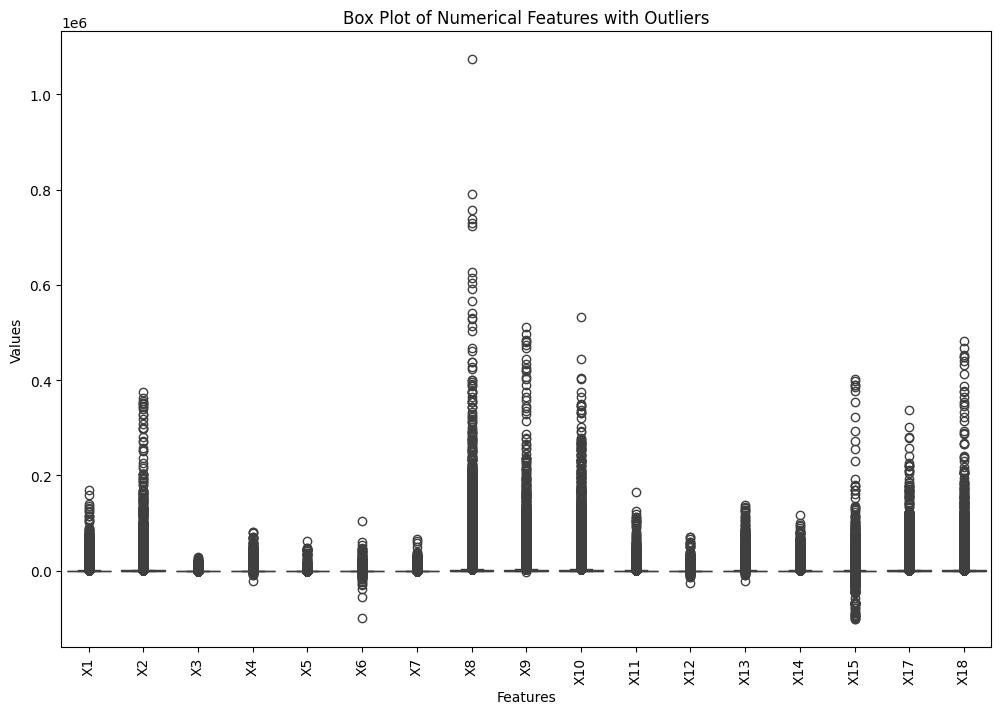

In [20]:
Q1 = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']].quantile(0.25)
Q3 = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']] < (Q1 - 1.5 * IQR)) | (df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']] > (Q3 + 1.5 * IQR)))

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']])
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features with Outliers")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

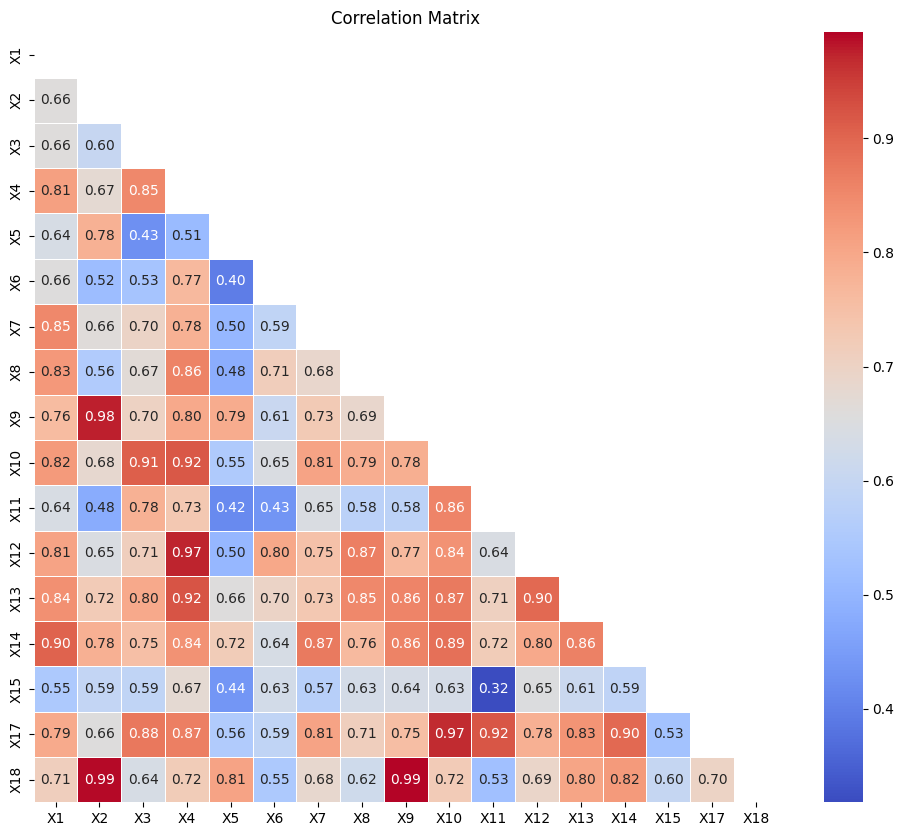

In [21]:
variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']
data = df[variables]
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()

X15 - low correlation effect with all other variables
potential multi-collinearity etween X2, X18, X9

17

<Axes: >

Text(0.5, 1.0, 'X1')

[]

<Axes: >

Text(0.5, 1.0, 'X2')

[]

<Axes: >

Text(0.5, 1.0, 'X3')

[]

<Axes: >

Text(0.5, 1.0, 'X4')

[]

<Axes: >

Text(0.5, 1.0, 'X5')

[]

<Axes: >

Text(0.5, 1.0, 'X6')

[]

<Axes: >

Text(0.5, 1.0, 'X7')

[]

<Axes: >

Text(0.5, 1.0, 'X8')

[]

<Axes: >

Text(0.5, 1.0, 'X9')

[]

<Axes: >

Text(0.5, 1.0, 'X10')

[]

<Axes: >

Text(0.5, 1.0, 'X11')

[]

<Axes: >

Text(0.5, 1.0, 'X12')

[]

<Axes: >

Text(0.5, 1.0, 'X13')

[]

<Axes: >

Text(0.5, 1.0, 'X14')

[]

<Axes: >

Text(0.5, 1.0, 'X15')

[]

<Axes: >

Text(0.5, 1.0, 'X17')

[]

<Axes: >

Text(0.5, 1.0, 'X18')

[]

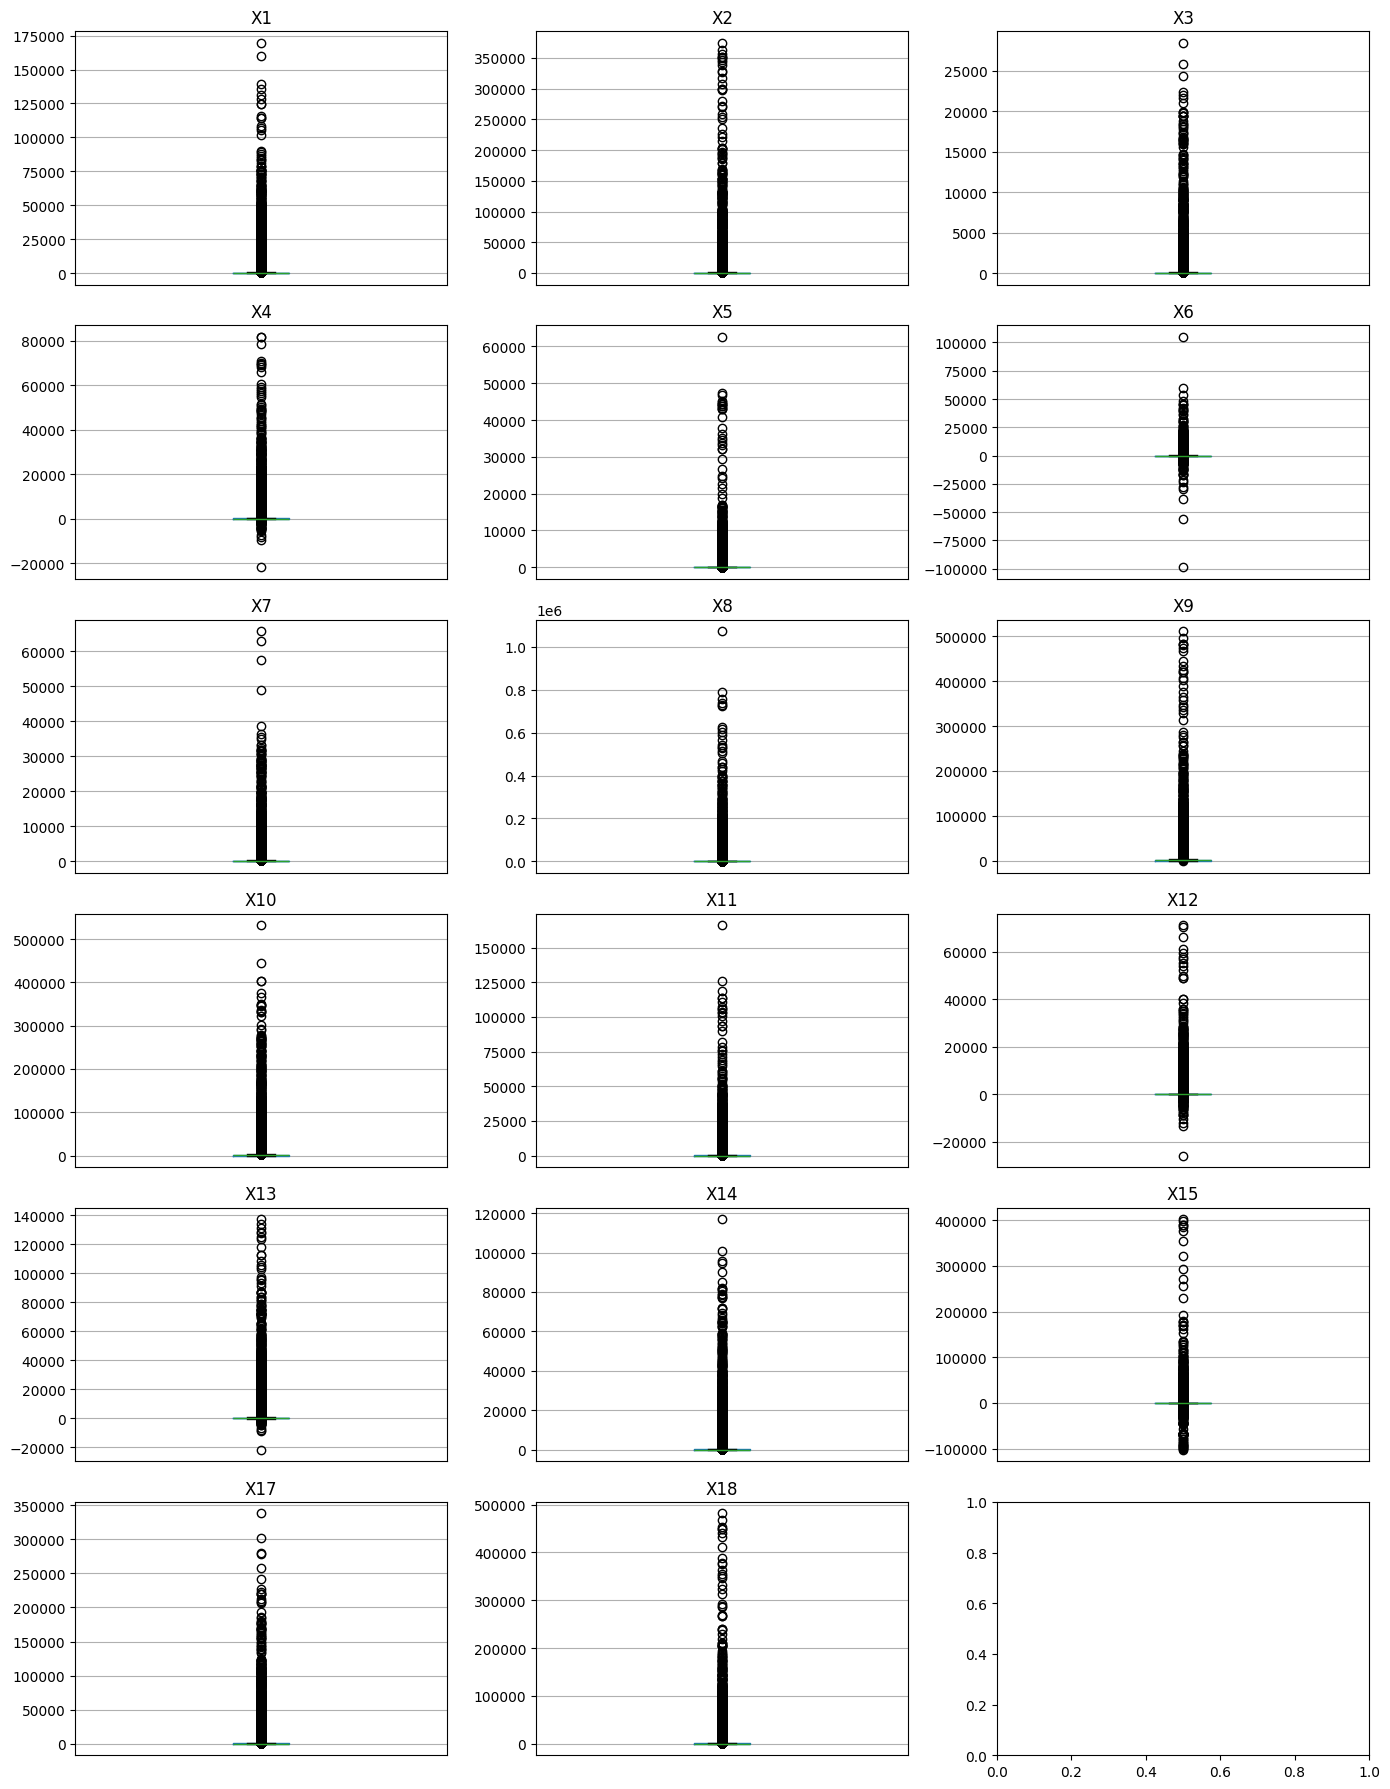

In [23]:
columns = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X17','X18']

df_out = df[columns]

len(columns)

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(14, 18))

for i, col in enumerate(columns):
    fila = i // 3
    columna = i % 3
    df_out.boxplot(column=col, ax=axes[fila, columna])
    axes[fila, columna].set_title(col)
    axes[fila, columna].set_xticks([]) # x axis without label

plt.tight_layout()
plt.show()

Overall, although there are a lot of outliers in the financial data, we are keeping it in. Why?


1. Outliers Represent Extreme Financial Distress
In bankruptcy prediction, outliers often represent companies in severe financial trouble. These extreme cases provide valuable signals that differentiate failing firms from healthy ones. Removing them may lead to a model that underestimates the risk of bankruptcy.

2. Real-World Financial Anomalies Matter
In finance, extreme values (such as sudden cash flow drops, skyrocketing debt ratios, or revenue crashes) often indicate early warning signs of distress. These events should be included in the model to improve predictive accuracy.

3. Bankruptcy is Rare but Critical
Bankruptcy is an uncommon event, meaning that removing outliers might remove some of the most important training examples. Keeping them helps ensure the model learns patterns from real bankruptcies.

In [25]:
alive_count = df['status_label'].value_counts()['alive']
failed_count = df['status_label'].value_counts()['failed']
total_count = alive_count + failed_count
alive_ratio = alive_count / total_count
failed_ratio = failed_count / total_count

print(df['status_label'].value_counts())
print("Alive Ratio:", alive_ratio) #93%
print("Failed Ratio:", failed_ratio) #6%

status_label
alive     73462
failed     5220
Name: count, dtype: int64
Alive Ratio: 0.9336569990595054
Failed Ratio: 0.06634300094049465


In [26]:
df.groupby("year")["status_label"].value_counts(normalize=True).unstack()

status_label     alive    failed
year                            
1999          0.928410  0.071590
2000          0.922694  0.077306
2001          0.915458  0.084542
2002          0.910987  0.089013
2003          0.906045  0.093955
2004          0.907084  0.092916
2005          0.909869  0.090131
2006          0.911337  0.088663
2007          0.916189  0.083811
2008          0.926368  0.073632
2009          0.937483  0.062517
2010          0.939862  0.060138
2011          0.944777  0.055223
2012          0.947776  0.052224
2013          0.952067  0.047933
2014          0.959475  0.040525
2015          0.966905  0.033095
2016          0.973989  0.026011
2017          0.981088  0.018912
2018          0.986779  0.013221

In [27]:

# Create contingency table
contingency_table = pd.crosstab(df["year"], df["status_label"])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, P-value: {p}")


Chi-Square Statistic: 731.2001247028753, P-value: 8.730479710760694e-143


Year is a significant factor in determining status_label. However, since we lack additional context such as the economic conditions of specific years, we aim to prevent the model from overfitting to time-based patterns. Instead, we want it to generalise well across different time periods and economic conditions. Therefore, we use random splitting with train_test_split rather than splitting by year. Additionally, we enable stratified sampling to ensure that the number of instances in the 'Failed' class is balanced across the training, validation, and test sets.

# Logistic Regression

## Preparing X data

In [31]:
# reset df
df = pd.read_csv("american_bankruptcy.csv")
df = df.drop('X16', axis=1)

# Convert X data into ratios relative to total assets
cols = df.columns.difference(["company_name", "status_label", "year"])

df[cols] = df[cols].div(df['X10'],axis=0)

df.head()

# Define function to calculate vif and drop columns with high vif
def calculate_vif(df, thresh=10.0):
    """
    Automatically drops features with VIF > thresh iteratively
    Returns the cleaned dataframe and VIF summary
    """
    variables = df.columns.tolist()
    dropped = []

    while True:
        vif = pd.DataFrame()
        vif["Feature"] = variables
        vif["VIF"] = [variance_inflation_factor(df[variables].values, i) for i in range(len(variables))]
        
        max_vif = vif["VIF"].max()
        if max_vif > thresh:
            max_vif_feature = vif.loc[vif["VIF"] == max_vif, "Feature"].values[0]
            print(f"Dropping '{max_vif_feature}' with VIF = {max_vif:.2e}")
            variables.remove(max_vif_feature)
            dropped.append(max_vif_feature)
        else:
            break

    print("\nFinal set of features with acceptable VIF:")
    print(vif[vif["VIF"] <= thresh].sort_values("VIF"))

    return df[variables], dropped


company_name status_label  year        X1        X2        X3        X4  \
0          C_1        alive  1999  0.689971  1.124304  0.024795  0.120150   
1          C_1        alive  2000  0.692247  1.017036  0.026468  0.091710   
2          C_1        alive  2001  0.614836  0.741309  0.031676  0.038309   
3          C_1        alive  2002  0.577337  0.723466  0.039574  0.044777   
4          C_1        alive  2003  0.609346  0.737781  0.037615  0.066955   

         X5        X6        X7        X8        X9  X10       X11       X12  \
0  0.453467  0.047454  0.173210  0.503040  1.382369  1.0  0.243519  0.095355   
1  0.456776  0.026403  0.164118  0.537317  1.245637  1.0  0.256445  0.065241   
2  0.403532 -0.082989  0.109164  0.513367  0.899355  1.0  0.306532  0.006633   
3  0.378599 -0.018074  0.096592  0.208746  0.883074  1.0  0.239809  0.005204   
4  0.348580  0.004940  0.147557  0.435515  0.919167  1.0  0.350583  0.029341   

        X13       X14       X15       X17       X18  
0  0.258065  0.221075  0.271291  0.541814  1.262219  
1  0.228600  0.178658  0.290751  0.515267  1.153927  
2  0.158046  0.211862  0.196569  0.563172  0.861046  
3  0.159608  0.296488  0.180749  0.570377  0.838297  
4  0.181387  0.185059  0.185938  0.574669  0.852212

In [32]:
alive_count = df['status_label'].value_counts()['alive']
failed_count = df['status_label'].value_counts()['failed']
total_count = alive_count + failed_count
alive_ratio = alive_count / total_count
failed_ratio = failed_count / total_count

print(df['status_label'].value_counts())
print("Alive Ratio:", alive_ratio) #93%
print("Failed Ratio:", failed_ratio) #6%

status_label
alive     73462
failed     5220
Name: count, dtype: int64
Alive Ratio: 0.9336569990595054
Failed Ratio: 0.06634300094049465


### Split into train and test sets

In [35]:
# Proceed to train-test split with stratified sampling
df_train, df_test = train_test_split(df, test_size=0.15, random_state=99, stratify=df['status_label'])

## Undersampling

In [38]:
# Downsample only Train set
df_majority = df_train[df.status_label == "alive"]
df_minority = df_train[df.status_label == "failed"]

# Downsample majority class to same length as minority class
df_majority_downsampled = resample(
    df_majority, 
    replace=False, 
    n_samples=len(df_minority), 
    random_state=99
)

df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced.head()
df_balanced.info()
print(df_balanced["status_label"].value_counts())

df_test.info()

company_name status_label  year        X1        X2        X3        X4  \
18026       C_1517        alive  2012  0.984360  2.756223  0.000881 -0.051692   
73006       C_8015        alive  2008  0.525053  0.100131  0.017071  0.119988   
24060       C_2081        alive  2000  0.685268  0.359056  0.091837 -0.415816   
66105       C_7124        alive  2002  0.274546  0.232491  0.055915  0.045364   
46284       C_4874        alive  1999  0.309046  0.322212  0.179396  0.134037   

             X5        X6        X7        X8        X9  X10       X11  \
18026  0.000000 -0.038182  0.671929  0.461003  3.297893  1.0  0.000000   
73006  0.067843  0.071124  0.121714  2.708081  0.614035  1.0  0.123578   
24060  0.057398 -0.460778  0.087691  3.384630  0.610013  1.0  0.020089   
66105  0.005699 -0.009722  0.139097  1.203593  0.795926  1.0  0.050448   
46284  0.000000 -0.133454  0.061142  0.649456  0.473729  1.0  0.588342   

            X12       X13       X14       X15       X17       X18  
18026 -0.052574  0.541670  0.344372  1.270725  0.344372  3.349585  
73006  0.102917  0.513904  0.185775  0.310016  0.314452  0.494047  
24060 -0.507653  0.250957  0.262755 -9.602997  0.282844  1.025829  
66105 -0.010552  0.563434  0.242267 -0.311704  0.292715  0.750562  
46284 -0.045359  0.151517  0.117615 -0.358590  0.705958  0.339691

<class 'pandas.core.frame.DataFrame'>
Index: 8874 entries, 18026 to 21469
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  8874 non-null   object 
 1   status_label  8874 non-null   object 
 2   year          8874 non-null   int64  
 3   X1            8874 non-null   float64
 4   X2            8874 non-null   float64
 5   X3            8874 non-null   float64
 6   X4            8874 non-null   float64
 7   X5            8874 non-null   float64
 8   X6            8874 non-null   float64
 9   X7            8874 non-null   float64
 10  X8            8874 non-null   float64
 11  X9            8874 non-null   float64
 12  X10           8874 non-null   float64
 13  X11           8874 non-null   float64
 14  X12           8874 non-null   float64
 15  X13           8874 non-null   float64
 16  X14           8874 non-null   float64
 17  X15           8874 non-null   float64
 18  X17           8874 non-null 

Train set ended up being smaller than Test set, should therefore downsampling might not be useful since a higher ratio has to be used to preserve data

In [40]:
# Define features and target from balanced dataset
X_raw = df_balanced.drop(columns=["status_label", "company_name", "year"])
y_train = df_balanced["status_label"] # Target column

# Apply VIF filter
X_train, dropped_columns = calculate_vif(X_raw, thresh=10.0)
print("Dropped due to high VIF:", dropped_columns)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# drop same classes in X test
X_test = df_test.drop(columns=["status_label", "company_name", "year"])
X_test = X_test.drop(columns = dropped_columns) # due to vif
y_test = df_test["status_label"] # Target column

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Dropping 'X2' with VIF = inf
Dropping 'X3' with VIF = inf
Dropping 'X4' with VIF = inf
Dropping 'X18' with VIF = 1.65e+03
Dropping 'X17' with VIF = 1.90e+02

Final set of features with acceptable VIF:
   Feature       VIF
1       X5  1.268306
0       X1  1.357377
3       X7  1.396701
5       X9  1.445997
4       X8  1.612808
7      X11  1.822548
9      X13  2.053285
2       X6  2.564390
10     X14  3.133625
11     X15  4.167689
6      X10  4.569396
8      X12  4.757392
Dropped due to high VIF: ['X2', 'X3', 'X4', 'X18', 'X17']
X_train shape: (8874, 12)
y_train shape: (8874,)
X_test shape: (11803, 12)
y_test shape: (11803,)


LogisticRegression(max_iter=1000)


Feature Coefficients:
   Feature  Coefficient
1       X5     1.046884
7      X11     0.211746
6      X10     0.151749
5       X9     0.094376
11     X15     0.000312
4       X8    -0.004313
10     X14    -0.004574
2       X6    -0.007646
8      X12    -0.018451
9      X13    -0.050186
3       X7    -0.738307
0       X1    -0.939956

Model Accuracy: 0.5342709480640515
Precision: 0.08779293459251486
Recall: 0.6411238825031929
F1 Score: 0.15443777880326104

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.53      0.68     11020
           1       0.09      0.64      0.15       783

    accuracy                           0.53     11803
   macro avg       0.52      0.58      0.42     11803
weighted avg       0.90      0.53      0.64     11803



<Figure size 500x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Predicted')

Text(33.22222222222222, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

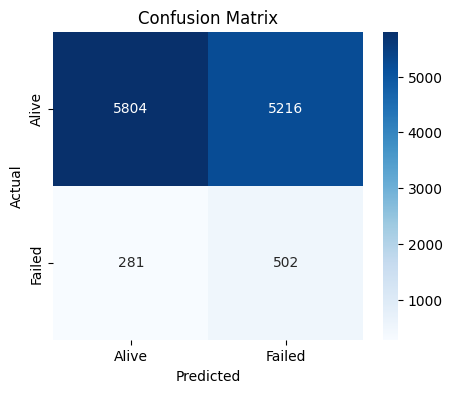

In [41]:
# Convert target labels to binary (0 = alive, 1 = failed)
y_train = y_train.map({'alive': 0, 'failed': 1})
y_test = y_test.map({'alive': 0, 'failed': 1})

# Initialize and fit the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increased iterations to ensure convergence
logreg.fit(X_train, y_train)

# Get the coefficients
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": logreg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Coefficients:")
print(coef_df)

# Model Predictions
y_pred = logreg.predict(X_test)

# Model Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Alive", "Failed"], yticklabels=["Alive", "Failed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Changing Threshold

Optimal Threshold for rf1: 0.5324553748684054
Harmonic mean of Recall and Accuracy:  0.573174981192404

Classification Report on test set with optimal threshold:
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     11020
           1       0.10      0.50      0.17       783

    accuracy                           0.68     11803
   macro avg       0.53      0.59      0.48     11803
weighted avg       0.89      0.68      0.76     11803



<Axes: >

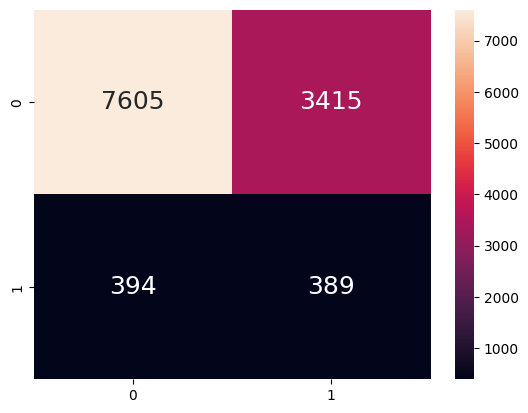

In [43]:
 # Find best threshold for classification
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)  # Get FPR, TPR, and thresholds
optimal_idx = (tpr - fpr).argmax()  # Find the threshold with the maximum difference between TPR and FPR
optimal_threshold = thresholds[optimal_idx]  # Get optimal threshold

print(f"Optimal Threshold for rf1: {optimal_threshold}")

y_pred = (y_pred_probs >= optimal_threshold).astype(int)  # Apply the threshold

# Calculate recall and accuracy for this fold
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculate harmonic mean of recall and accuracy
harmonic_mean = 2 * (recall * accuracy) / (recall + accuracy)

print("Harmonic mean of Recall and Accuracy: ", harmonic_mean)

print("\nClassification Report on test set with optimal threshold:")
print(classification_report(y_test, y_pred))

# Plot the Confusion Matrix for new threshold
sns.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

## SMOTE

In [45]:
# reset X and y
X_train = df_train.drop(columns=["status_label", "company_name", "year"])
y_train = df_train["status_label"].map({'alive': 0, 'failed': 1}) # Target column
X_test = df_test.drop(columns=["status_label", "company_name", "year", ])
y_test = df_test["status_label"].map({'alive': 0, 'failed': 1}) # Target column

# VIF filtering BEFORE SMOTE
X_train_vif, dropped_cols = calculate_vif(X_train, thresh=10.0)
X_test_vif = X_test.drop(columns=dropped_cols)

# Apply SMOTE on VIF-cleaned training data
smote = SMOTE(sampling_strategy='auto', random_state=99)
X_train_sm, y_train_sm = smote.fit_resample(X_train_vif, y_train)

# Check new class distribution
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_sm))

# Fit logistic regression
logreg2 = LogisticRegression(max_iter=1000)
logreg2.fit(X_train_sm, y_train_sm)

# Coefficients
coef_df = pd.DataFrame({
    "Feature": X_train_vif.columns,
    "Coefficient": logreg2.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Coefficients:")
print(coef_df)


Dropping 'X18' with VIF = 1.41e+13
Dropping 'X12' with VIF = 3.73e+08
Dropping 'X2' with VIF = 3.39e+08
Dropping 'X17' with VIF = 2.08e+02

Final set of features with acceptable VIF:
   Feature       VIF
6       X8  1.034705
3       X5  1.145661
5       X7  1.174875
9      X11  1.239514
0       X1  1.289261
1       X3  1.453582
7       X9  1.473327
10     X13  2.923754
12     X15  3.296150
11     X14  3.325346
4       X6  4.626525
8      X10  5.119463
2       X4  7.149309
Before SMOTE: Counter({0: 62442, 1: 4437})
After SMOTE: Counter({0: 62442, 1: 62442})


LogisticRegression(max_iter=1000)


Feature Coefficients:
   Feature  Coefficient
3       X5     1.247268
8      X10     0.228259
7       X9     0.024235
9      X11     0.002919
2       X4     0.001209
10     X13     0.000982
12     X15     0.000045
6       X8    -0.001738
11     X14    -0.002864
4       X6    -0.006692
1       X3    -0.025050
5       X7    -0.819044
0       X1    -1.048000


SMOTE generated a 1:1 ratio for majority : minority class


Model Accuracy: 0.5195289333220368
Precision: 0.08435374149659863
Recall: 0.6334610472541508
F1 Score: 0.14888188503677022

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.51      0.67     11020
           1       0.08      0.63      0.15       783

    accuracy                           0.52     11803
   macro avg       0.52      0.57      0.41     11803
weighted avg       0.89      0.52      0.63     11803



<Figure size 500x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Predicted')

Text(33.22222222222222, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

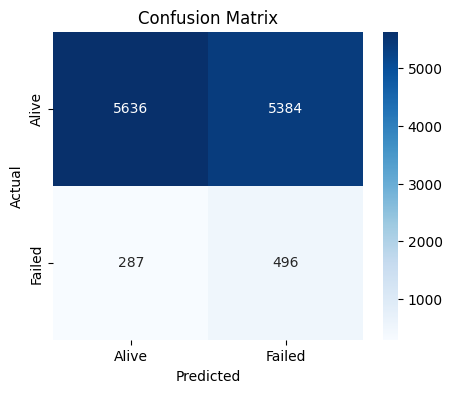

In [51]:
# Predictions and Evaluation
y_pred = logreg2.predict(X_test_vif)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Alive", "Failed"], yticklabels=["Alive", "Failed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Changing Threshold

Optimal Threshold for rf1: 0.5225923924954633
Harmonic mean of Recall and Accuracy:  0.5754407389336482

Classification Report on test set with optimal threshold:
              precision    recall  f1-score   support

           0       0.95      0.62      0.75     11020
           1       0.09      0.54      0.16       783

    accuracy                           0.61     11803
   macro avg       0.52      0.58      0.45     11803
weighted avg       0.89      0.61      0.71     11803



<Axes: >

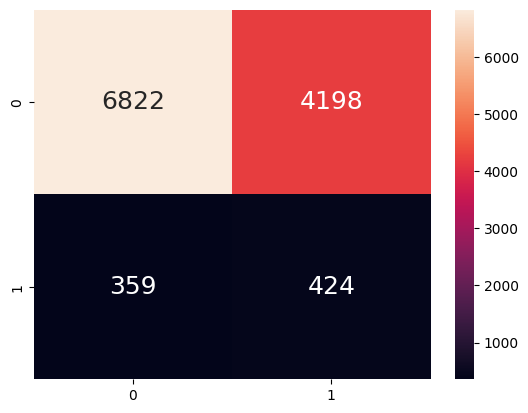

In [57]:
 # Find best threshold for classification
y_pred_probs = logreg2.predict_proba(X_test_vif)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)  # Get FPR, TPR, and thresholds
optimal_idx = (tpr - fpr).argmax()  # Find the threshold with the maximum difference between TPR and FPR
optimal_threshold = thresholds[optimal_idx]  # Get optimal threshold

print(f"Optimal Threshold for rf1: {optimal_threshold}")

y_pred = (y_pred_probs >= optimal_threshold).astype(int)  # Apply the threshold

# Calculate recall and accuracy for this fold
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculate harmonic mean of recall and accuracy
harmonic_mean = 2 * (recall * accuracy) / (recall + accuracy)

print("Harmonic mean of Recall and Accuracy: ", harmonic_mean)

print("\nClassification Report on test set with optimal threshold:")
print(classification_report(y_test, y_pred))

# Plot the Confusion Matrix for new threshold
sns.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Random Forest
## No balancing or tuning

In [60]:
# prepare X-data
df = pd.read_csv("american_bankruptcy.csv")
df = df.drop('X16', axis=1)
X = df.drop(columns=["status_label", "company_name", "year"])  # Features (all columns except status_label)
y = df["status_label"]  # Target column

# Split the data: 85% train, 15% test with stratified sampling to maintain balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=99, stratify=df['status_label'])
y_train = y_train.map({'alive': 0, 'failed': 1})
y_test = y_test.map({'alive': 0, 'failed': 1})

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("Train distribution:", y_train.value_counts())
print("Test distribution:", y_test.value_counts())

X_train shape: (66879, 17)
X_test shape: (11803, 17)
y_train shape: (66879,)
y_test shape: (11803,)
Train distribution: status_label
0    62442
1     4437
Name: count, dtype: int64
Test distribution: status_label
0    11020
1      783
Name: count, dtype: int64


In [66]:
# use default rsf_size for categorical Y
# Train a random forest with OOB score enabled
rf1 = RandomForestClassifier(
    n_estimators=500,  # Number of trees
    random_state=99,
    oob_score=True,
    bootstrap=True,  # Enables OOB estimation
    warm_start=True  # Allows incremental tree addition
)

# Store OOB errors for different tree counts
oob_errors = []
for n in range(10, 501, 10):  # Increment by 10 trees
    rf1.set_params(n_estimators=n)  
    rf1.fit(X_train, y_train)
    oob_errors.append(1 - rf1.oob_score_)

# Convert to NumPy array for plotting
oob_errors = np.array(oob_errors)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=20, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=20, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=30, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=30, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=40, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=40, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=60, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=60, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=70, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=70, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=80, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=80, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=90, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=90, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(oob_score=True, random_state=99, warm_start=True)

RandomForestClassifier(oob_score=True, random_state=99, warm_start=True)

RandomForestClassifier(n_estimators=110, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=110, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=120, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=120, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=130, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=130, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=140, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=140, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=150, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=150, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=160, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=160, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=170, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=170, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=180, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=180, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=190, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=190, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=210, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=210, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=220, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=220, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=230, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=230, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=240, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=240, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=250, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=250, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=260, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=260, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=270, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=270, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=280, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=280, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=290, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=290, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=310, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=310, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=320, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=320, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=330, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=330, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=340, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=340, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=350, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=350, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=360, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=360, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=370, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=370, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=380, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=380, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=390, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=390, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=400, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=400, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=410, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=410, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=420, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=420, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=430, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=430, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=440, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=440, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=450, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=450, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=460, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=460, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=470, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=470, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=480, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=480, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=490, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=490, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=99,
                       warm_start=True)

<Figure size 800x500 with 0 Axes>

Text(0.5, 0, 'Number of Trees')

Text(0, 0.5, 'OOB Error Rate')

Text(0.5, 1.0, 'OOB Error vs. Number of Trees in Random Forest')

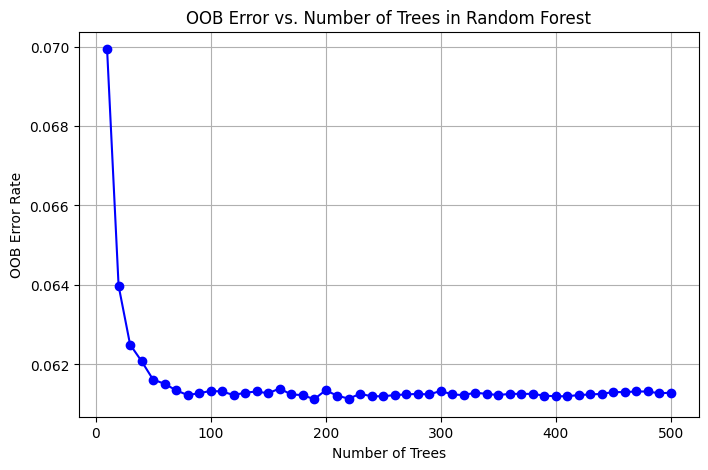

In [68]:
# OOB plot
plt.figure(figsize=(8, 5))
plt.plot(range(10, 501, 10), oob_errors, marker='o', linestyle='-', color='b')

# Labels and title
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error Rate")
plt.title("OOB Error vs. Number of Trees in Random Forest")
plt.grid(True)
plt.show()


Accuracy on train set: 1.0
Accuracy on test set: 0.9382360416843175

Classification Report on test set:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11020
           1       0.97      0.07      0.13       783

    accuracy                           0.94     11803
   macro avg       0.95      0.54      0.55     11803
weighted avg       0.94      0.94      0.91     11803



<Axes: >

<Axes: >

Precision: 0.9655
Recall: 0.0715
False Positives (FP): 4198
False Negatives (FN): 359
True Positives (TP): 424
True Negatives (TN): 6822


<Figure size 1000x500 with 0 Axes>

<Axes: >

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'X8'),
  Text(1, 0, 'X15'),
  Text(2, 0, 'X3'),
  Text(3, 0, 'X1'),
  Text(4, 0, 'X7'),
  Text(5, 0, 'X13'),
  Text(6, 0, 'X17'),
  Text(7, 0, 'X10'),
  Text(8, 0, 'X6'),
  Text(9, 0, 'X14'),
  Text(10, 0, 'X2'),
  Text(11, 0, 'X18'),
  Text(12, 0, 'X5'),
  Text(13, 0, 'X11'),
  Text(14, 0, 'X12'),
  Text(15, 0, 'X4'),
  Text(16, 0, 'X9')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance Score')

Text(0.5, 1.0, 'Feature Importances in Random Forest')

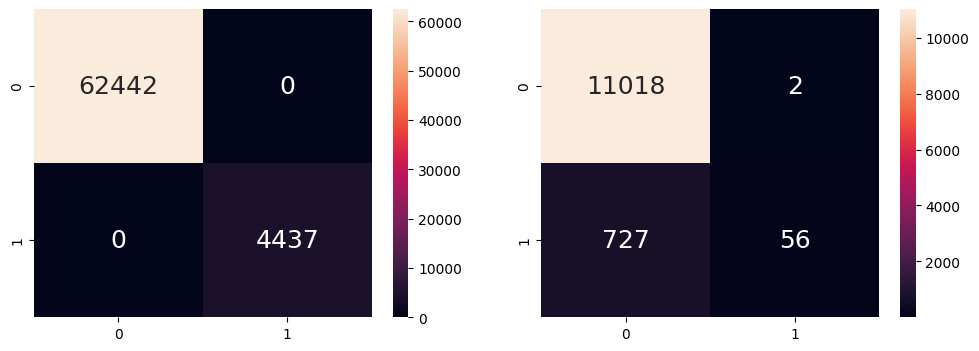

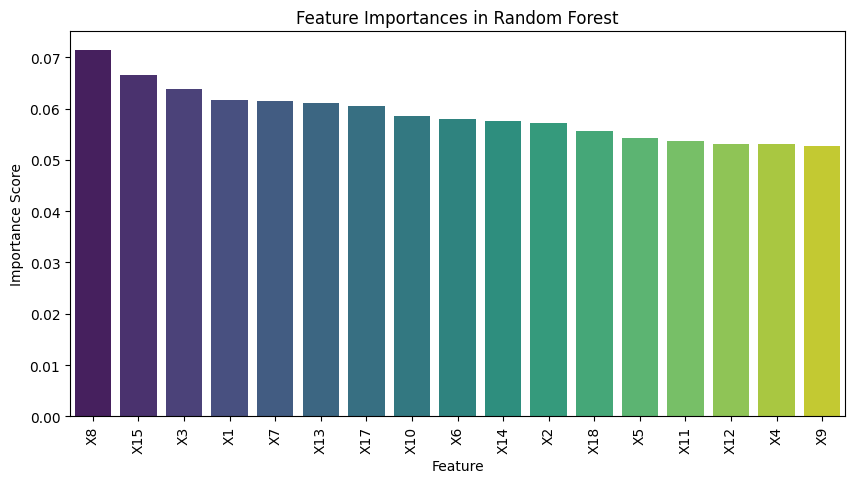

In [69]:
y_train_pred = rf1.predict(X_train)
y_test_pred = rf1.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Compute precision and recall
precision = precision_score(y_test, y_test_pred, pos_label=1)
recall = recall_score(y_test, y_test_pred, pos_label=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")

# Plot Feature Importances
feature_importances = rf1.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(X_train.columns)[sorted_idx], y=feature_importances[sorted_idx], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances in Random Forest")
plt.show()

### Changing threshold

Optimal Threshold for rf1: 0.098
Harmonic mean of Recall and Accuracy:  0.7812850776224937

Classification Report on test set with optimal threshold:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     11020
           1       0.21      0.77      0.33       783

    accuracy                           0.80     11803
   macro avg       0.60      0.78      0.61     11803
weighted avg       0.93      0.80      0.84     11803



<Axes: >

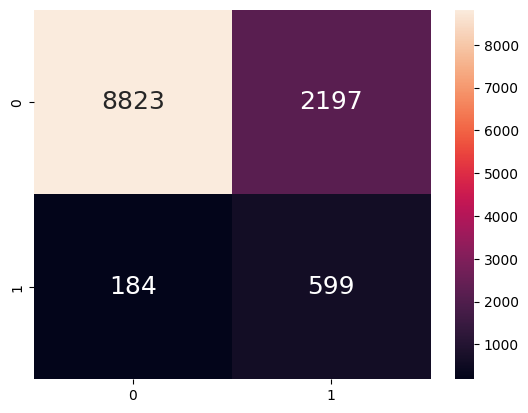

In [71]:
 # Find best threshold for classification
y_pred_probs = rf1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)  # Get FPR, TPR, and thresholds
optimal_idx = (tpr - fpr).argmax()  # Find the threshold with the maximum difference between TPR and FPR
optimal_threshold = thresholds[optimal_idx]  # Get optimal threshold

print(f"Optimal Threshold for rf1: {optimal_threshold}")

y_pred = (y_pred_probs >= optimal_threshold).astype(int)  # Apply the threshold

# Calculate recall and accuracy for this fold
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculate harmonic mean of recall and accuracy
harmonic_mean = 2 * (recall * accuracy) / (recall + accuracy)

print("Harmonic mean of Recall and Accuracy: ", harmonic_mean)

print("\nClassification Report on test set with optimal threshold:")
print(classification_report(y_test, y_pred))

# Plot the Confusion Matrix for new threshold
sns.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

## Undersampling on train-set

In [73]:
# Combine X_train and y_train for downsampling
train_df = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes in the training set
df_majority = train_df[train_df.status_label == 0]
df_minority = train_df[train_df.status_label == 1]

# Downsample the majority class in the training set
df_majority_downsampled = resample(
    df_majority, 
    replace=False, 
    n_samples=len(df_minority), 
    random_state=99
)

# Combine the downsampled majority class with the minority class
train_balanced = pd.concat([df_majority_downsampled, df_minority])

# Separate features and labels again
X_train_re = train_balanced.drop(columns=["status_label"])
y_train_re = train_balanced["status_label"]

train_balanced.head()

X1       X2       X3      X4      X5      X6      X7        X8  \
18026   13.406   37.537    0.012  -0.704   0.000  -0.520   9.151    6.2784   
73006  152.679   29.117    4.964  34.891  19.728  20.682  35.393  787.4776   
24060    2.149    1.126    0.288  -1.304   0.180  -1.445   0.275   10.6142   
66105   30.781   26.066    6.269   5.086   0.639  -1.090  15.595  134.9420   
46284  179.649  187.302  104.283  77.916   0.000 -77.577  35.542  377.5293   

            X9      X10      X11     X12      X13     X14      X15      X17  \
18026   44.914   13.619    0.000  -0.716    7.377   4.690   17.306    4.690   
73006  178.554  290.788   35.935  29.927  149.437  54.021   90.149   91.439   
24060    1.913    3.136    0.063  -1.592    0.787   0.824  -30.115    0.887   
66105   89.236  112.116    5.656  -1.183   63.170  27.162  -34.947   32.818   
46284  275.379  581.301  342.004 -26.367   88.077  68.370 -208.449  410.374   

           X18  status_label  
18026   45.618             0  
73006  143.663             0  
24060    3.217             0  
66105   84.150             0  
46284  197.463             0

In [74]:
# Train a random forest with OOB score enabled
rf2 = RandomForestClassifier(
    n_estimators=500,  # Number of trees
    random_state=99,
    oob_score=True,
    bootstrap=True,  # Enables OOB estimation
    warm_start=True  # Allows incremental tree addition
)

# Store OOB errors for different tree counts
oob_errors2 = []
for n in range(10, 501, 10):  # Increment by 10 trees
    rf2.set_params(n_estimators=n)  
    rf2.fit(X_train_re, y_train_re)
    oob_errors2.append(1 - rf2.oob_score_)

# Convert to NumPy array for plotting
oob_errors2 = np.array(oob_errors2)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=20, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=20, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=30, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=30, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=40, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=40, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=60, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=60, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=70, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=70, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=80, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=80, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=90, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=90, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(oob_score=True, random_state=99, warm_start=True)

RandomForestClassifier(oob_score=True, random_state=99, warm_start=True)

RandomForestClassifier(n_estimators=110, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=110, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=120, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=120, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=130, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=130, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=140, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=140, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=150, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=150, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=160, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=160, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=170, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=170, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=180, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=180, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=190, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=190, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=210, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=210, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=220, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=220, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=230, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=230, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=240, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=240, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=250, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=250, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=260, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=260, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=270, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=270, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=280, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=280, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=290, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=290, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=310, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=310, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=320, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=320, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=330, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=330, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=340, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=340, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=350, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=350, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=360, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=360, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=370, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=370, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=380, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=380, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=390, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=390, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=400, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=400, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=410, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=410, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=420, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=420, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=430, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=430, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=440, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=440, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=450, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=450, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=460, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=460, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=470, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=470, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=480, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=480, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=490, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=490, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=99,
                       warm_start=True)

<Figure size 800x500 with 0 Axes>

Text(0.5, 0, 'Number of Trees')

Text(0, 0.5, 'OOB Error Rate')

Text(0.5, 1.0, 'OOB Error vs. Number of Trees in Random Forest')

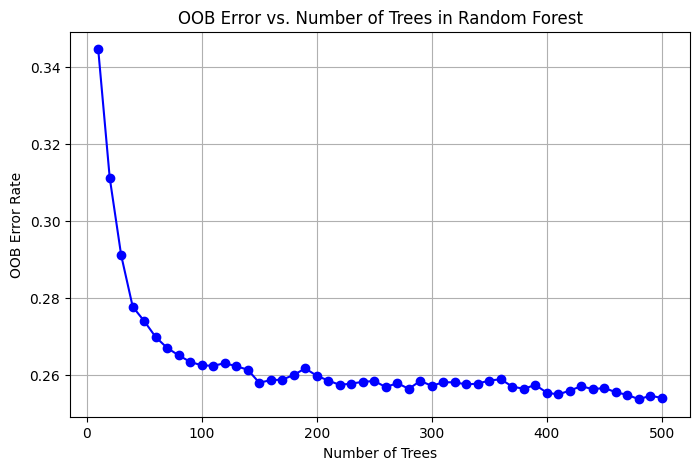

In [75]:
# OOB plot
plt.figure(figsize=(8, 5))
plt.plot(range(10, 501, 10), oob_errors2, marker='o', linestyle='-', color='b')

# Labels and title
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error Rate")
plt.title("OOB Error vs. Number of Trees in Random Forest")
plt.grid(True)
plt.show()


In [76]:
# Add more trees since it looks like it OOB error rate might still be dropping

# Train a random forest with OOB score enabled
rf3 = RandomForestClassifier(
    n_estimators=1000,  # Number of trees
    random_state=99,
    oob_score=True,
    bootstrap=True,  # Enables OOB estimation
    warm_start=True  # Allows incremental tree addition
)

# Store OOB errors for different tree counts
oob_errors3 = []
for n in range(10, 1001, 10):  # Increment by 10 trees
    rf3.set_params(n_estimators=n)  
    rf3.fit(X_train_re, y_train_re)
    oob_errors3.append(1 - rf3.oob_score_)

# Convert to NumPy array for plotting
oob_errors3 = np.array(oob_errors3)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=20, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=20, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=30, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=30, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=40, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=40, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=60, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=60, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=70, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=70, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=80, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=80, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=90, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=90, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(oob_score=True, random_state=99, warm_start=True)

RandomForestClassifier(oob_score=True, random_state=99, warm_start=True)

RandomForestClassifier(n_estimators=110, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=110, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=120, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=120, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=130, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=130, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=140, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=140, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=150, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=150, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=160, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=160, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=170, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=170, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=180, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=180, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=190, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=190, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=210, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=210, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=220, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=220, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=230, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=230, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=240, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=240, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=250, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=250, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=260, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=260, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=270, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=270, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=280, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=280, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=290, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=290, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=310, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=310, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=320, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=320, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=330, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=330, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=340, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=340, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=350, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=350, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=360, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=360, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=370, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=370, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=380, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=380, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=390, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=390, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=400, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=400, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=410, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=410, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=420, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=420, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=430, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=430, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=440, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=440, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=450, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=450, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=460, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=460, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=470, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=470, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=480, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=480, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=490, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=490, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=510, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=510, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=520, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=520, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=530, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=530, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=540, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=540, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=550, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=550, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=560, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=560, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=570, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=570, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=580, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=580, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=590, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=590, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=600, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=600, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=610, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=610, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=620, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=620, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=630, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=630, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=640, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=640, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=650, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=650, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=660, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=660, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=670, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=670, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=680, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=680, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=690, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=690, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=700, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=700, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=710, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=710, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=720, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=720, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=730, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=730, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=740, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=740, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=750, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=750, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=760, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=760, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=770, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=770, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=780, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=780, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=790, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=790, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=800, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=800, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=810, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=810, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=820, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=820, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=830, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=830, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=840, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=840, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=850, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=850, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=860, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=860, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=870, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=870, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=880, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=880, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=890, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=890, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=900, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=900, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=910, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=910, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=920, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=920, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=930, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=930, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=940, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=940, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=950, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=950, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=960, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=960, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=970, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=970, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=980, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=980, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=990, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=990, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=99,
                       warm_start=True)

<Figure size 800x500 with 0 Axes>

Text(0.5, 0, 'Number of Trees')

Text(0, 0.5, 'OOB Error Rate')

Text(0.5, 1.0, 'OOB Error vs. Number of Trees in Random Forest')

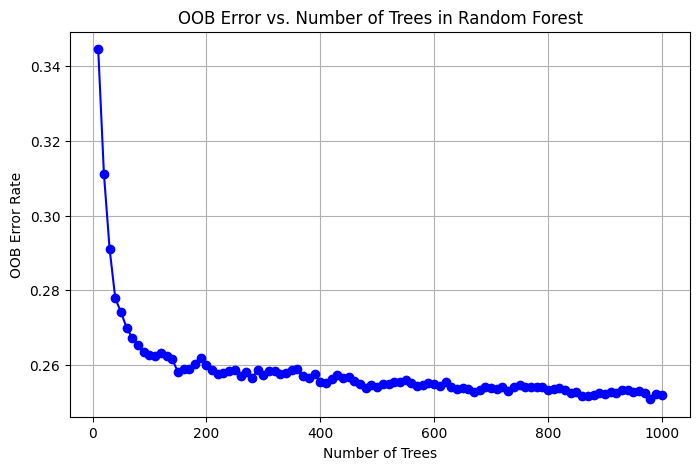

In [77]:
# OOB plot
plt.figure(figsize=(8, 5))
plt.plot(range(10, 1001, 10), oob_errors3, marker='o', linestyle='-', color='b')

# Labels and title
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error Rate")
plt.title("OOB Error vs. Number of Trees in Random Forest")
plt.grid(True)
plt.show()

OOB errors seem to have stabilised by 1000th tree

Accuracy on train set: 1.0
Accuracy on test set: 0.7314242141828349

Classification Report on test set:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84     11020
           1       0.17      0.77      0.28       783

    accuracy                           0.73     11803
   macro avg       0.57      0.75      0.56     11803
weighted avg       0.92      0.73      0.80     11803



<Axes: >

<Axes: >

Precision: 0.1684
Recall: 0.7739
False Positives (FP): 2197
False Negatives (FN): 184
True Positives (TP): 599
True Negatives (TN): 8823


<Figure size 1000x500 with 0 Axes>

<Axes: >

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'X8'),
  Text(1, 0, 'X6'),
  Text(2, 0, 'X15'),
  Text(3, 0, 'X3'),
  Text(4, 0, 'X17'),
  Text(5, 0, 'X7'),
  Text(6, 0, 'X1'),
  Text(7, 0, 'X11'),
  Text(8, 0, 'X13'),
  Text(9, 0, 'X2'),
  Text(10, 0, 'X10'),
  Text(11, 0, 'X14'),
  Text(12, 0, 'X12'),
  Text(13, 0, 'X18'),
  Text(14, 0, 'X4'),
  Text(15, 0, 'X5'),
  Text(16, 0, 'X9')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance Score')

Text(0.5, 1.0, 'Feature Importances in Random Forest')

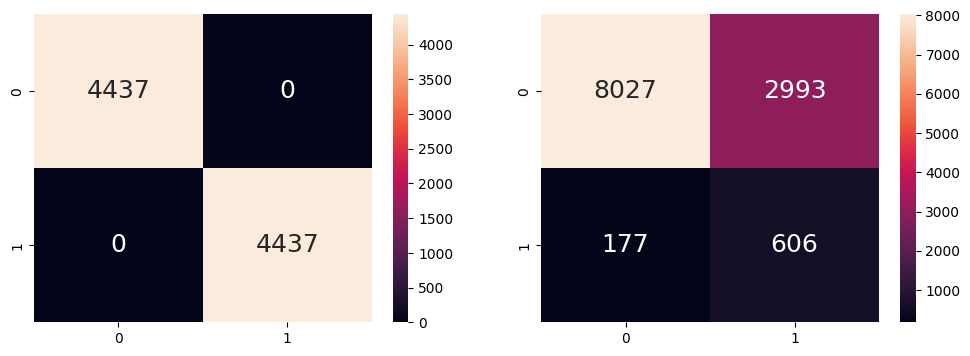

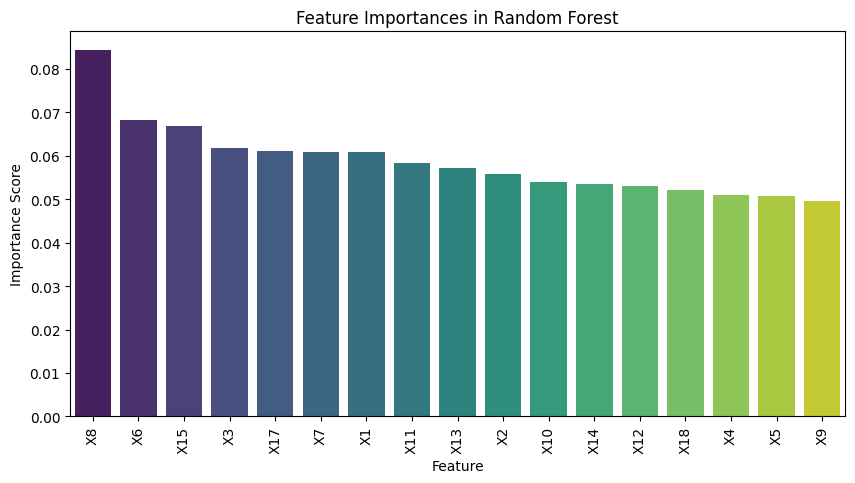

In [79]:
y_train_pred = rf3.predict(X_train_re)
y_test_pred = rf3.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_train_re, y_train_pred)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_re, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Compute precision and recall
precision = precision_score(y_test, y_test_pred, pos_label=1)
recall = recall_score(y_test, y_test_pred, pos_label=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")

# Plot Feature Importances
feature_importances = rf3.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(X_train_re.columns)[sorted_idx], y=feature_importances[sorted_idx], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances in Random Forest")
plt.show()

### Changing Threshold

Optimal Threshold: 0.537
[0 1]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     11020
           1       0.19      0.73      0.31       783

    accuracy                           0.78     11803
   macro avg       0.59      0.76      0.59     11803
weighted avg       0.92      0.78      0.83     11803



<Axes: >

Harmonic mean of Recall and Accuracy:  0.7553963690655824
Precision: 0.1940
Recall: 0.7318
False Positives (FP): 2380
False Negatives (FN): 210
True Positives (TP): 573
True Negatives (TN): 8640


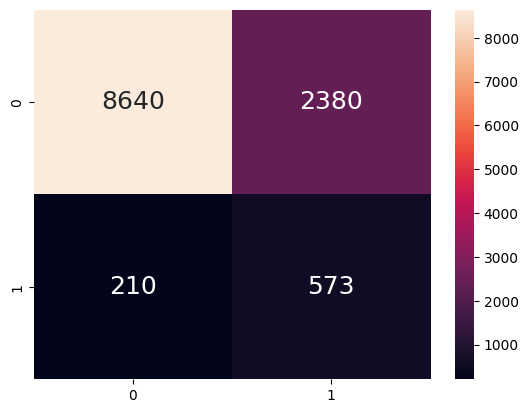

In [81]:
y_probs = rf3.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Choose the threshold that gives the best recall-precision tradeoff
best_threshold = thresholds[np.argmax(tpr - fpr)]

print(f"Optimal Threshold: {best_threshold}")

y_pred_adjusted = (y_probs >= best_threshold).astype(int)

print(np.unique(y_pred_adjusted))  # Should only contain 0 and 1
print(classification_report(y_test, y_pred_adjusted))

# Compute the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted),
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Compute precision and recall
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
accuracy = accuracy_score(y_test, y_pred_adjusted)

# Calculate harmonic mean of recall and accuracy
harmonic_mean = 2 * (recall * accuracy) / (recall + accuracy)

print("Harmonic mean of Recall and Accuracy: ", harmonic_mean)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)
tn, fp, fn, tp = cm.ravel()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")

## SMOTE (with adjusted sampling strategy)

In [83]:
smote = SMOTE(random_state=99,sampling_strategy='auto')
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_SMOTE))

Before SMOTE: Counter({0: 62442, 1: 4437})
After SMOTE: Counter({0: 62442, 1: 62442})


In [84]:
# Train a random forest with OOB score enabled
rf4 = RandomForestClassifier(
    n_estimators=500,  # Number of trees
    random_state=99,
    oob_score=True,
    bootstrap=True,  # Enables OOB estimation
    warm_start=True  # Allows incremental tree addition
)

# Store OOB errors for different tree counts
oob_errors4 = []
for n in range(10, 501, 10):  # Increment by 10 trees
    rf4.set_params(n_estimators=n)  
    rf4.fit(X_train_SMOTE, y_train_SMOTE)
    oob_errors4.append(1 - rf4.oob_score_)

# Convert to NumPy array for plotting
oob_errors4 = np.array(oob_errors4)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=20, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=20, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=30, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=30, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=40, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=40, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=60, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=60, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=70, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=70, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=80, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=80, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=90, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=90, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(oob_score=True, random_state=99, warm_start=True)

RandomForestClassifier(oob_score=True, random_state=99, warm_start=True)

RandomForestClassifier(n_estimators=110, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=110, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=120, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=120, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=130, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=130, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=140, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=140, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=150, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=150, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=160, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=160, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=170, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=170, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=180, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=180, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=190, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=190, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=210, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=210, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=220, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=220, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=230, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=230, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=240, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=240, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=250, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=250, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=260, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=260, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=270, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=270, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=280, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=280, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=290, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=290, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=310, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=310, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=320, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=320, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=330, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=330, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=340, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=340, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=350, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=350, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=360, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=360, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=370, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=370, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=380, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=380, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=390, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=390, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=400, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=400, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=410, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=410, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=420, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=420, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=430, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=430, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=440, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=440, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=450, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=450, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=460, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=460, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=470, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=470, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=480, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=480, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=490, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=490, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=99,
                       warm_start=True)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=99,
                       warm_start=True)

<Figure size 800x500 with 0 Axes>

Text(0.5, 0, 'Number of Trees')

Text(0, 0.5, 'OOB Error Rate')

Text(0.5, 1.0, 'OOB Error vs. Number of Trees in Random Forest')

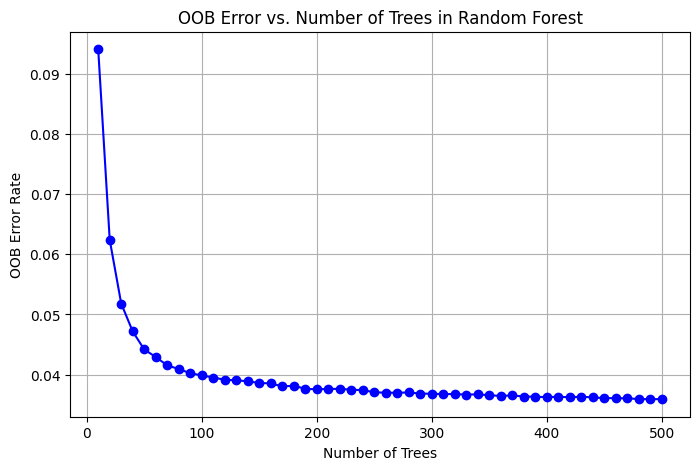

In [85]:
# OOB plot
plt.figure(figsize=(8, 5))
plt.plot(range(10, 501, 10), oob_errors4, marker='o', linestyle='-', color='b')

# Labels and title
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error Rate")
plt.title("OOB Error vs. Number of Trees in Random Forest")
plt.grid(True)
plt.show()

Accuracy on train set: 1.0
Accuracy on test set: 0.9264593747352368

Classification Report on test set:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11020
           1       0.45      0.49      0.47       783

    accuracy                           0.93     11803
   macro avg       0.71      0.72      0.72     11803
weighted avg       0.93      0.93      0.93     11803



<Axes: >

<Axes: >

Precision: 0.4503
Recall: 0.4917
False Positives (FP): 2197
False Negatives (FN): 184
True Positives (TP): 599
True Negatives (TN): 8823


<Figure size 1000x500 with 0 Axes>

<Axes: >

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'X11'),
  Text(1, 0, 'X8'),
  Text(2, 0, 'X15'),
  Text(3, 0, 'X5'),
  Text(4, 0, 'X6'),
  Text(5, 0, 'X3'),
  Text(6, 0, 'X2'),
  Text(7, 0, 'X13'),
  Text(8, 0, 'X17'),
  Text(9, 0, 'X7'),
  Text(10, 0, 'X1'),
  Text(11, 0, 'X10'),
  Text(12, 0, 'X18'),
  Text(13, 0, 'X9'),
  Text(14, 0, 'X14'),
  Text(15, 0, 'X12'),
  Text(16, 0, 'X4')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance Score')

Text(0.5, 1.0, 'Feature Importances in Random Forest')

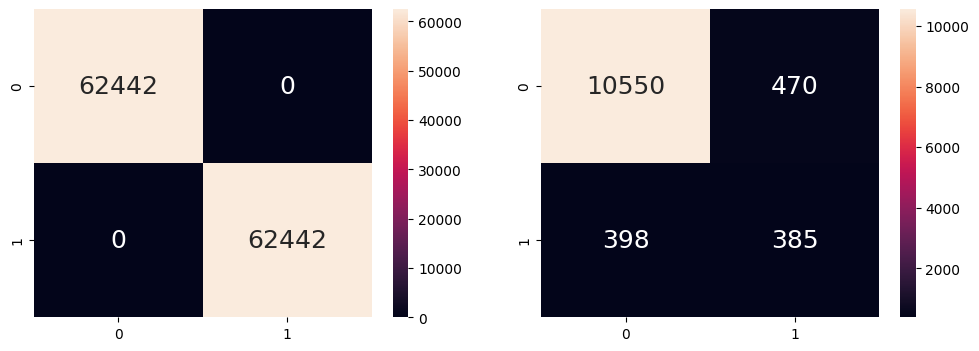

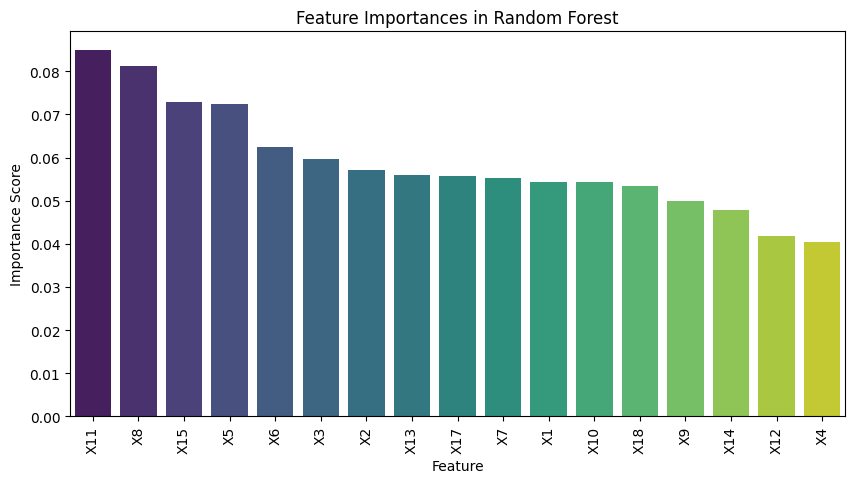

In [86]:
y_train_pred = rf4.predict(X_train_SMOTE)
y_test_pred = rf4.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_train_SMOTE, y_train_pred)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_SMOTE, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Compute precision and recall
precision = precision_score(y_test, y_test_pred, pos_label=1)
recall = recall_score(y_test, y_test_pred, pos_label=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")

# Plot Feature Importances
feature_importances = rf4.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(X_train_SMOTE.columns)[sorted_idx], y=feature_importances[sorted_idx], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances in Random Forest")
plt.show()

### Changing Threshold

Optimal Threshold: 0.28
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     11020
           1       0.23      0.77      0.35       783

    accuracy                           0.81     11803
   macro avg       0.60      0.79      0.62     11803
weighted avg       0.93      0.81      0.85     11803



<Axes: >

Harmonic mean of Recall and Accuracy:  0.791361337158594
Precision: 0.2276
Recall: 0.7727
False Positives (FP): 2053
False Negatives (FN): 178
True Positives (TP): 605
True Negatives (TN): 8967


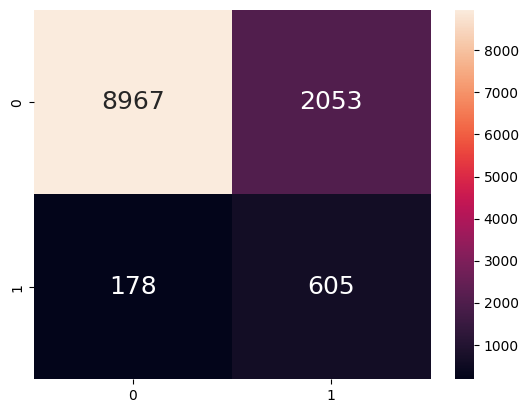

In [88]:
y_probs = rf4.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Choose the threshold that gives the best recall-precision tradeoff
best_threshold = thresholds[np.argmax(tpr - fpr)]

print(f"Optimal Threshold: {best_threshold}")
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

print(classification_report(y_test, y_pred_adjusted))

# Compute the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted),
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Compute precision and recall
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
accuracy = accuracy_score(y_test, y_pred_adjusted)

# Calculate harmonic mean of recall and accuracy
harmonic_mean = 2 * (recall * accuracy) / (recall + accuracy)

print("Harmonic mean of Recall and Accuracy: ", harmonic_mean)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)
tn, fp, fn, tp = cm.ravel()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")

In [89]:
# export model
joblib.dump(rf4, 'rf4.pkl')

['rf4.pkl']

# Simple Neural Network

## Set seeds

In [5]:
# Set a fixed seed for reproducibility
SEED = 99

# 1. Set NumPy seed
np.random.seed(SEED)

# 2. Set Python's built-in random seed
random.seed(SEED)

# 3. Set TensorFlow seed
tf.random.set_seed(SEED)

# 4. Ensure TensorFlow runs deterministically
os.environ['PYTHONHASHSEED'] = str(SEED)
tf.config.experimental.enable_op_determinism()


## Convert X data into ratios relative to total assets

In [542]:
# reset df
df = pd.read_csv("american_bankruptcy.csv")
df = df.drop('X16', axis=1)

cols = df.columns.difference(["company_name", "status_label", "year"])

df[cols] = df[cols].div(df['X10'],axis=0)

df.head()

company_name status_label  year        X1        X2        X3        X4  \
0          C_1        alive  1999  0.689971  1.124304  0.024795  0.120150   
1          C_1        alive  2000  0.692247  1.017036  0.026468  0.091710   
2          C_1        alive  2001  0.614836  0.741309  0.031676  0.038309   
3          C_1        alive  2002  0.577337  0.723466  0.039574  0.044777   
4          C_1        alive  2003  0.609346  0.737781  0.037615  0.066955   

         X5        X6        X7        X8        X9  X10       X11       X12  \
0  0.453467  0.047454  0.173210  0.503040  1.382369  1.0  0.243519  0.095355   
1  0.456776  0.026403  0.164118  0.537317  1.245637  1.0  0.256445  0.065241   
2  0.403532 -0.082989  0.109164  0.513367  0.899355  1.0  0.306532  0.006633   
3  0.378599 -0.018074  0.096592  0.208746  0.883074  1.0  0.239809  0.005204   
4  0.348580  0.004940  0.147557  0.435515  0.919167  1.0  0.350583  0.029341   

        X13       X14       X15       X17       X18  
0  0.258065  0.221075  0.271291  0.541814  1.262219  
1  0.228600  0.178658  0.290751  0.515267  1.153927  
2  0.158046  0.211862  0.196569  0.563172  0.861046  
3  0.159608  0.296488  0.180749  0.570377  0.838297  
4  0.181387  0.185059  0.185938  0.574669  0.852212

## Split into train and test sets using Train-Test-Split

In [7]:
df_train, df_test = train_test_split(df, test_size=0.15, stratify=df['status_label'], random_state=99)
print(df_train['status_label'].value_counts())
print(df_test['status_label'].value_counts())
df_train.head()

status_label
alive     62442
failed     4437
Name: count, dtype: int64
status_label
alive     11020
failed      783
Name: count, dtype: int64


company_name status_label  year        X1        X2        X3        X4  \
9883         C_821        alive  2017  0.147445  0.155654  0.049694  0.097573   
15246       C_1254        alive  2016  0.398343  0.228912  0.030578  0.126560   
76939       C_8636        alive  2015  0.208366  1.006434  0.057479  0.126114   
25653       C_2255        alive  1999  0.744802  0.090868  0.043129  0.257418   
51329       C_5427        alive  2017  0.124345  0.425878  0.025707  0.147672   

             X5        X6        X7        X8        X9  X10       X11  \
9883   0.000000  0.050187  0.026780  0.816364  0.304065  1.0  0.115756   
15246  0.015886  0.015899  0.231188  0.483167  0.583604  1.0  0.471191   
76939  0.000000  0.002889  0.136754  0.799647  1.285710  1.0  0.604914   
25653  0.001661  0.072469  0.087226  2.144284  0.877930  1.0  0.028570   
51329  0.009045  0.073503  0.088641  1.265938  0.733981  1.0  0.356850   

            X12       X13       X14       X15       X17       X18  
9883   0.047880  0.148411  0.038747  0.466160  0.338861  0.206491  
15246  0.095983  0.354692  0.398761  0.713981  1.017759  0.457044  
76939  0.068634  0.279275  0.151790 -0.147112  0.885932  1.159596  
25653  0.214289  0.787062  0.248859 -0.716487  0.311035  0.620511  
51329  0.121965  0.308102  0.100638  0.675045  0.520613  0.586309

### Split into X and y data

In [92]:
y_train = df_train["status_label"]
X_train = df_train.drop(columns = ["company_name", "status_label", "year", "X10"]) # drop X10 since it is all 1

y_test = df_test["status_label"]
X_test = df_test.drop(columns = ["company_name", "status_label", "year", "X10"])

## Define function

- 'class_weight' allows for recommended class weights from sklearn
- 'verbose' shows training information
- 'plot' plots confusion matrix for best model
- Default (model_type) is 3 Hidden layers: 128->64->32
- Uses 5-fold cross validation, 4 folds for training 1 fold for validation, every loop will test directly on test set to select the best model (keras uses a validation set to train and shows val_accuracy as well if verbose = 1, no need to evaluate on validation set, and we will select the best predictions on the test set anyways)

In [28]:
def train_nn(df_train, df_test, verbose=0, plot=1, model_type=2, n_folds=5, class_weight=False):
    le = LabelEncoder()
    y_test_encoded = le.fit_transform(df_test['status_label'])
    X_test = df_test.drop(columns=["status_label", "company_name", "year", "X10"])
    
    # Create Stratified K-Folds
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=99)
    
    # Store results for each fold
    recall_scores = []
    accuracy_scores = []
    classification_reports = []
    harmonic_means = []
    
    best_model = None
    best_harmonic_mean = -np.inf  # Start with a very low value for the best harmonic mean
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(df_train, df_train['status_label'])):
        
        print(f"Fold {fold + 1}/{n_folds}")
        
        # Split data into train and validation sets for this fold
        df_train_fold = df_train.iloc[train_idx]
        df_val_fold = df_train.iloc[val_idx]
        
        # Split into X and y variables
        X_train = df_train_fold.drop(columns=["status_label", "company_name", "year", "X10"])  # Features
        y_train_encoded = le.transform(df_train_fold["status_label"])
        X_val = df_val_fold.drop(columns=["status_label", "company_name", "year", "X10"])  # Features
        y_val_encoded = le.transform(df_val_fold["status_label"])

        if class_weight:
            # Calculate class weights
            class_weights = compute_class_weight(
                class_weight='balanced', 
                classes=np.unique(y_train_encoded), 
                y=y_train_encoded
            )
            
            class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
            print(f"Class Weights for Fold {fold + 1}: {class_weight_dict}")
        else:
            class_weight_dict = {0: 1.0, 1: 1.0}
        
        model = None                                                                                                        
        
        # Define the neural network model
        if model_type == 1:
            model = Sequential([
                Dense(64, activation='relu', input_dim=(X_train.shape[1])),
                BatchNormalization(),
                Dropout(0.3),
                
                Dense(32, activation='relu'),
                BatchNormalization(),
                Dropout(0.3),
                
                Dense(1, activation='sigmoid')  # Binary classification output
            ])
        elif model_type == 2:
            model = Sequential([
                Dense(128, activation='relu', input_dim=(X_train.shape[1])),
                BatchNormalization(),
                Dropout(0.3),
                
                Dense(64, activation='relu'),
                BatchNormalization(),
                Dropout(0.3),
                
                Dense(32, activation='relu'),
                BatchNormalization(),
                Dropout(0.3),
                
                Dense(1, activation='sigmoid')  # Binary classification output
            ])
        elif model_type == 3:
            model = Sequential([
                Dense(256, activation='relu', input_dim=(X_train.shape[1])),
                BatchNormalization(),
                Dropout(0.3),
            
                Dense(128, activation='relu'),
                BatchNormalization(),
                Dropout(0.3),
                
                Dense(64, activation='relu'),
                BatchNormalization(),
                Dropout(0.3),
                
                Dense(32, activation='relu'),
                BatchNormalization(),
                Dropout(0.3),
                
                Dense(1, activation='sigmoid')  # Binary classification output
            ])
            
        # Train neural network
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        
        model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_val, y_val_encoded), 
                  callbacks=[early_stopping], verbose=verbose, class_weight=class_weight_dict)
        
        # Find best threshold for classification
        y_pred_probs = model.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs)  # Get FPR, TPR, and thresholds
        optimal_idx = (tpr - fpr).argmax()  # Find the threshold with the maximum difference between TPR and FPR
        optimal_threshold = thresholds[optimal_idx]  # Get optimal threshold
        
        print(f"Optimal Threshold for Fold {fold + 1}: {optimal_threshold}")
        
        y_pred = (y_pred_probs >= optimal_threshold).astype(int)  # Apply the threshold
        
        # Calculate recall and accuracy for this fold
        recall = recall_score(y_test_encoded, y_pred)
        accuracy = accuracy_score(y_test_encoded, y_pred)
        
        # Calculate harmonic mean of recall and accuracy
        harmonic_mean = 2 * (recall * accuracy) / (recall + accuracy)

        print(f"Classification Report for Fold {fold + 1} with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
        print(f"Confusion Matrix for Fold {fold + 1}:")
        print("Harmonic mean of Recall and Accuracy: ", harmonic_mean)
        print(confusion_matrix(y_test_encoded, y_pred))
            
        
        # Track the best model based on the highest harmonic mean
        if harmonic_mean > best_harmonic_mean:
            best_harmonic_mean = harmonic_mean
            best_model = model  # Store the best model
        
        # Store metrics for reporting
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)
        classification_reports.append(classification_report(y_test_encoded, y_pred, output_dict=True))
        harmonic_means.append(harmonic_mean)

    # After cross-validation, calculate the average performance across all folds
    avg_recall = np.mean(recall_scores)
    avg_accuracy = np.mean(accuracy_scores)

    print(f"\nAverage Recall across {n_folds} folds: {avg_recall}")
    print(f"Average Accuracy across {n_folds} folds: {avg_accuracy}")
    print(f"\nMaximum Harmonic Mean of Recall and Accuracy across {n_folds} folds: {np.max(harmonic_means)}")
    
    if plot:
        # Find best threshold for classification
        y_pred_probs = best_model.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs)  # Get FPR, TPR, and thresholds
        optimal_idx = (tpr - fpr).argmax()  # Find the threshold with the maximum difference between TPR and FPR
        optimal_threshold = thresholds[optimal_idx]  # Get optimal threshold
        
        print(f"Optimal Threshold for Best Model: {optimal_threshold}")
        
        y_pred = (y_pred_probs >= optimal_threshold).astype(int)  # Apply the threshold
        print(f"Classification Report for Best Model with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
        print(f"Confusion Matrix for Best Model:")
        sns.heatmap(confusion_matrix(y_test_encoded, y_pred), annot=True, fmt=".0f", annot_kws={"size": 18})

    return best_model  # Return the best model based on the highest harmonic mean of recall and accuracy


## No balancing

### Keras

Fold 1/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
Optimal Threshold for Fold 1: 0.05378285050392151
Classification Report for Fold 1 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.65      0.78     11020
           1       0.12      0.67      0.20       783

    accuracy                           0.65     11803
   macro avg       0.54      0.66      0.49     11803
weighted avg       0.91      0.65      0.74     11803

Confusion Matrix for Fold 1:
Harmonic mean of Recall and Accuracy:  0.6596905852418972
[[7153 3867]
 [ 259  524]]
Fold 2/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
Optimal Threshold for Fold 2: 0.04336890950798988
Classification Report for Fold 2 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.59      0.73     11020
           1       0.11      0.70      0.19       783

    accuracy                           0.60     11803
   macro avg       0.

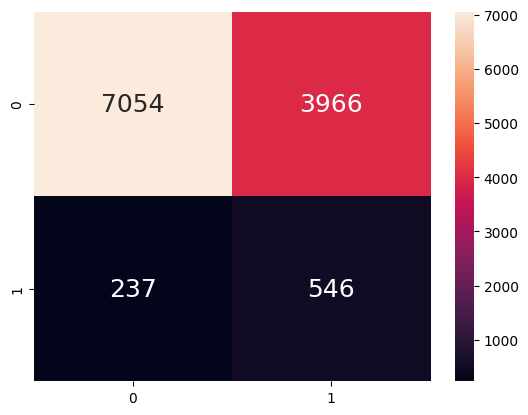

In [29]:
model_unbalanced = train_nn(df_train, df_test)

In [63]:
# save model
model_unbalanced.save("model_unbalanced.keras")

## Keras with class weights

Fold 1/5
Class Weights for Fold 1: {0: 0.5355334013973134, 1: 7.535633802816902}
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
Optimal Threshold for Fold 1: 0.4419666528701782
Classification Report for Fold 1 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.65      0.78     11020
           1       0.12      0.67      0.20       783

    accuracy                           0.65     11803
   macro avg       0.54      0.66      0.49     11803
weighted avg       0.91      0.65      0.74     11803

Confusion Matrix for Fold 1:
Harmonic mean of Recall and Accuracy:  0.663433933523358
[[7178 3842]
 [ 255  528]]
Fold 2/5
Class Weights for Fold 2: {0: 0.5355334013973134, 1: 7.535633802816902}
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
Optimal Threshold for Fold 2: 0.340806782245636
Classification Report for Fold 2 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.62      0.76 

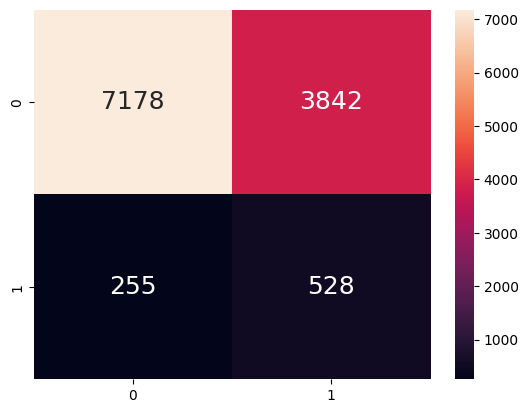

In [64]:
nn_weighted = train_nn(df_train, df_test, class_weight=True)

In [91]:
# save model
nn_weighted.save("nn_weighted.keras")

## Balancing dataset

In [22]:
print("Train set:")
print(df_train['status_label'].value_counts())

print("\nTest set: ")
print(df_test['status_label'].value_counts())


Train set:
status_label
alive     62442
failed     4437
Name: count, dtype: int64

Test set: 
status_label
alive     11020
failed      783
Name: count, dtype: int64


### Undersample Majority class in train set

#### Trying different integer ratios of Majority class : Minority class

##### Defining a Function to undersample and train model

In [30]:
def undersample(df_train, df_test, n_folds=5, n=1, verbose=0, plot=1):
        
    # Perform undersampling on the training data
    df_majority = df_train[df_train.status_label == "alive"]
    df_minority = df_train[df_train.status_label == "failed"]
    
    # Downsample majority class
    df_majority_downsampled = resample(
        df_majority, 
        replace=False, 
        n_samples=n * len(df_minority), 
        random_state=99
    )
    
    df_balanced = pd.concat([df_majority_downsampled, df_minority])

    model = train_nn(df_balanced, df_test, n_folds=n_folds, verbose=verbose, plot=plot)
    return model
        
       

##### 1:1 ratio

Fold 1/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
Optimal Threshold for Fold 1: 0.45747020840644836
Classification Report for Fold 1 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.56      0.71     11020
           1       0.11      0.75      0.19       783

    accuracy                           0.58     11803
   macro avg       0.54      0.66      0.45     11803
weighted avg       0.91      0.58      0.68     11803

Confusion Matrix for Fold 1:
Harmonic mean of Recall and Accuracy:  0.65137320026947
[[6200 4820]
 [ 195  588]]
Fold 2/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
Optimal Threshold for Fold 2: 0.4339887201786041
Classification Report for Fold 2 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.65      0.77     11020
           1       0.12      0.68      0.20       783

    accuracy                           0.65     11803
   macro avg       0.54 

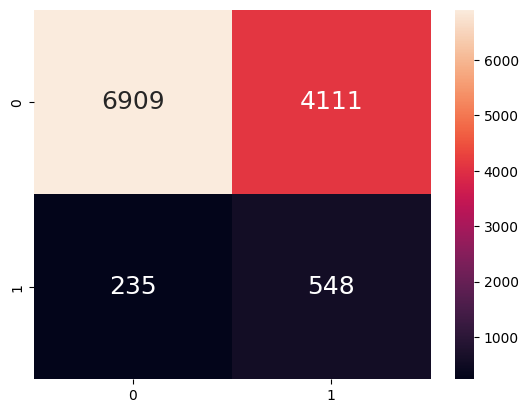

In [65]:
model11 = undersample(df_train, df_test, n=1)

In [76]:
# save model
model11.save("model11.keras")

##### 2:1 ratio

Fold 1/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step
Optimal Threshold for Fold 1: 0.2947380542755127
Classification Report for Fold 1 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.58      0.72     11020
           1       0.11      0.73      0.19       783

    accuracy                           0.59     11803
   macro avg       0.54      0.65      0.46     11803
weighted avg       0.91      0.59      0.69     11803

Confusion Matrix for Fold 1:
Harmonic mean of Recall and Accuracy:  0.6500135758892208
[[6360 4660]
 [ 213  570]]
Fold 2/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
Optimal Threshold for Fold 2: 0.36497119069099426
Classification Report for Fold 2 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.59      0.73     11020
           1       0.11      0.71      0.19       783

    accuracy                           0.60     11803
   macro avg       0.5

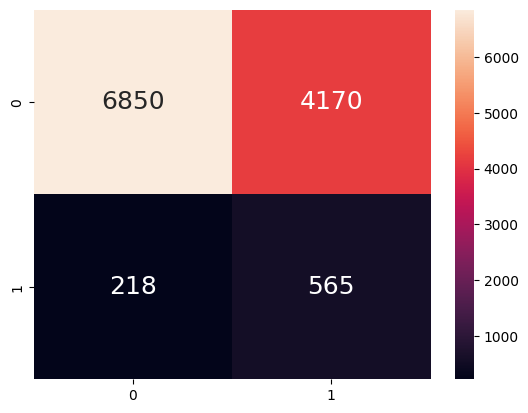

In [77]:
model21 = undersample(df_train, df_test, n=2)

In [82]:
# save model
model21.save("model21.keras")

##### 3:1 ratio

Fold 1/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
Optimal Threshold for Fold 1: 0.2348114252090454
Classification Report for Fold 1 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.55      0.70     11020
           1       0.11      0.79      0.19       783

    accuracy                           0.57     11803
   macro avg       0.54      0.67      0.45     11803
weighted avg       0.92      0.57      0.67     11803

Confusion Matrix for Fold 1:
Harmonic mean of Recall and Accuracy:  0.6586194416016559
[[6078 4942]
 [ 168  615]]
Fold 2/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
Optimal Threshold for Fold 2: 0.24460673332214355
Classification Report for Fold 2 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.65      0.78     11020
           1       0.12      0.67      0.20       783

    accuracy                           0.65     11803
   macro avg       0.5

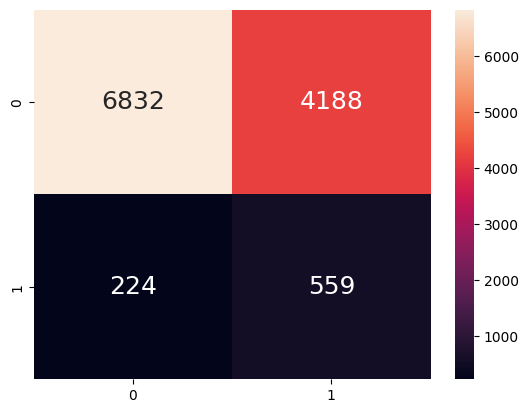

In [78]:
model31 = undersample(df_train, df_test, n=3)

In [83]:
# save model
model31.save("model31.keras")

##### 4:1 ratio

Fold 1/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
Optimal Threshold for Fold 1: 0.18365968763828278
Classification Report for Fold 1 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.55      0.70     11020
           1       0.11      0.79      0.19       783

    accuracy                           0.57     11803
   macro avg       0.54      0.67      0.45     11803
weighted avg       0.92      0.57      0.67     11803

Confusion Matrix for Fold 1:
Harmonic mean of Recall and Accuracy:  0.6595864065576222
[[6051 4969]
 [ 163  620]]
Fold 2/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
Optimal Threshold for Fold 2: 0.18029195070266724
Classification Report for Fold 2 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.65      0.78     11020
           1       0.13      0.71      0.21       783

    accuracy                           0.65     11803
   macro avg       0.

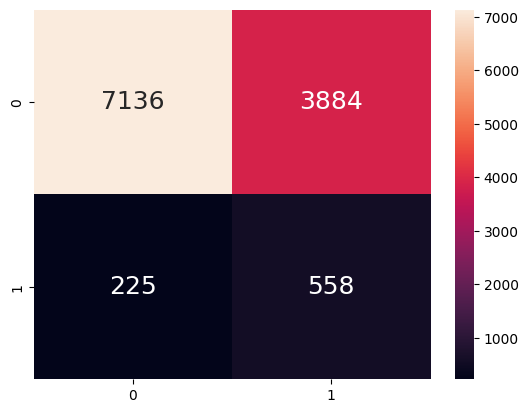

In [79]:
model41 = undersample(df_train, df_test, n=4)

In [84]:
# save model
model41.save("model41.keras")

### Synthetic Minority Over-sampling Technique (SMOTE)

#### Defining a Function to perform smote and train model

In [73]:
def smote_nn(df_train, df_test, n_folds=5, ratio=1, plot=1, verbose=0):
        
    # Split into X and y variables
    X_train = df_train.drop(columns=["status_label", "company_name", "year", "X10"])  # Features
    y_train = df_train["status_label"]  # Target column

    # Define SMOTE
    smote = SMOTE(sampling_strategy=ratio, random_state=99) 

    # Apply SMOTE only to training data
    X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

    # Check new class distribution
    print("Before SMOTE:", Counter(y_train))
    print("After SMOTE:", Counter(y_train_oversampled))

    # Convert X_train_oversampled to DataFrame
    X_train_oversampled = pd.DataFrame(X_train_oversampled, columns=X_train.columns)

    # Add the removed columns back as empty (NaN)
    X_train_oversampled["company_name"] = np.nan
    X_train_oversampled["year"] = np.nan
    X_train_oversampled["X10"] = np.nan
    
    df_oversampled = pd.concat([X_train_oversampled, y_train_oversampled], axis=1)
    model = train_nn(df_oversampled, df_test, n_folds=n_folds, verbose=verbose, plot=plot)
    return model

#### Keras

Before SMOTE: Counter({'alive': 62442, 'failed': 4437})
After SMOTE: Counter({'alive': 62442, 'failed': 62442})
Fold 1/5
Epoch 1/100
3123/3123 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6073 - loss: 0.7009 - val_accuracy: 0.6352 - val_loss: 0.6657
Epoch 2/100
3123/3123 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6561 - loss: 0.6251 - val_accuracy: 0.6700 - val_loss: 0.6484
Epoch 3/100
3123/3123 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6659 - loss: 0.6120 - val_accuracy: 0.6645 - val_loss: 0.6571
Epoch 4/100
3123/3123 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6739 - loss: 0.6051 - val_accuracy: 0.6759 - val_loss: 0.6479
Epoch 5/100
3123/3123 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6764 - loss: 0.5997 - val_accuracy: 0.6324 - val_loss: 0.6600
Epoch 6/100
3123/3123 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6829 - loss: 0.5939 - val_accuracy: 0.6456 - val_loss: 0.6420
Epoch 7/100
3123/3123 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6861 - loss: 0.5896 - va

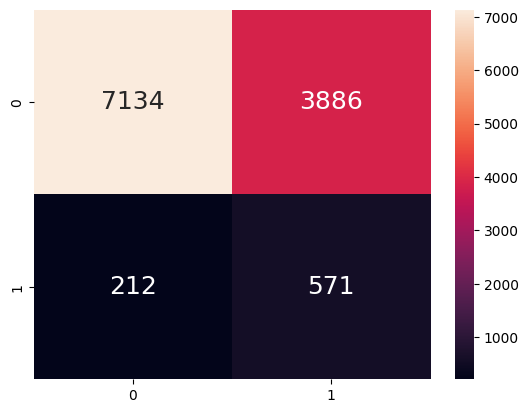

In [57]:
smote_nn1 = smote_nn(df_train, df_test, ratio=1, plot=1, verbose=1)

In [59]:
# save model
smote_nn1.save("smote_nn1.keras")

### Undersampling + Oversampling in train set

In [72]:
def resample_nn(df_train, df_test, n_folds=5, ratio=0.2, plot=1, verbose=0):
        
    # Split into X and y variables
    X_train = df_train.drop(columns=["status_label", "company_name", "year", "X10"])  # Features
    y_train = df_train["status_label"]  # Target column

    # Define SMOTE
    smote = SMOTE(sampling_strategy=ratio, random_state=99) 

    # Apply SMOTE only to training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Check new class distribution
    print("Before SMOTE:", Counter(y_train))
    print("After SMOTE:", Counter(y_train_resampled))

    temp_df = pd.concat([y_train_resampled.to_frame(), X_train_resampled], axis=1)

    df_majority = temp_df[temp_df.status_label == "alive"]
    df_minority = temp_df[temp_df.status_label == "failed"]
    
    # Downsample majority class
    df_majority_downsampled = resample(
        df_majority, 
        replace=False, 
        n_samples=len(df_minority), 
        random_state=99
    )

    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    df_balanced.head()
    df_balanced.info()

    df_balanced = pd.DataFrame(df_balanced, columns=df_train.columns)

    # Add the removed columns back as empty (NaN)
    df_balanced["company_name"] = np.nan
    df_balanced["year"] = np.nan
    df_balanced["X10"] = np.nan

    print("After Resampling:", Counter(df_balanced["status_label"]))
    
    model = train_nn(df_balanced, df_test, n_folds=n_folds, verbose=verbose, plot=plot)
    return model

Before SMOTE: Counter({'alive': 62442, 'failed': 4437})
After SMOTE: Counter({'alive': 62442, 'failed': 12488})
<class 'pandas.core.frame.DataFrame'>
Index: 24976 entries, 32927 to 74929
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status_label  24976 non-null  object 
 1   X1            24976 non-null  float64
 2   X2            24976 non-null  float64
 3   X3            24976 non-null  float64
 4   X4            24976 non-null  float64
 5   X5            24976 non-null  float64
 6   X6            24976 non-null  float64
 7   X7            24976 non-null  float64
 8   X8            24976 non-null  float64
 9   X9            24976 non-null  float64
 10  X11           24976 non-null  float64
 11  X12           24976 non-null  float64
 12  X13           24976 non-null  float64
 13  X14           24976 non-null  float64
 14  X15           24976 non-null  float64
 15  X17           24976 non-null  float64
 16  X

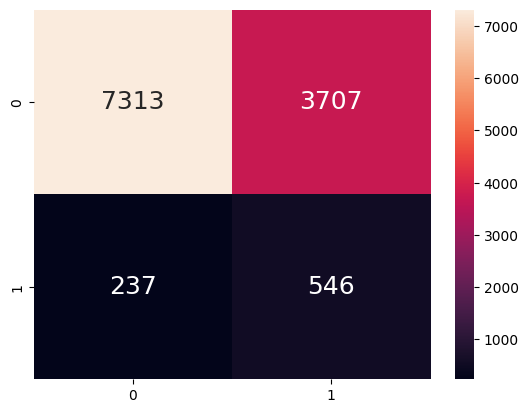

In [74]:
model_resampled = resample_nn(df_train, df_test, verbose=1)

In [81]:
# save model
model_resampled.save("model_resampled.keras")

# Altman's Z-Score Model

## Assume 'Grey' Zone is Alive

In [85]:
df2 = pd.read_csv("american_bankruptcy.csv")
df2['ZX1'] = (df2["X1"] - df2["X14"]) / df2["X10"] # (Current Assets - Current Liabilities) / Total Assets
df2['ZX2'] = df2['X15']/df2['X10'] # Retained Earnings / Total Assets
df2['ZX3'] = df2["X12"]/df2['X10'] # EBIT / Total Assets
df2['ZX4'] = df2['X8']/df2['X17'] # Market Captitalization / Total Liabilities
df2['ZX5'] = df2['X9']/df2['X10'] # Sales / Total Assets

df2["Z"] = 1.2*df2["ZX1"] + 1.4*df2["ZX2"] + 3.3*df2["ZX3"] + 0.6*df2["ZX4"] + 1*df2["ZX5"]


# Define conditions
conditions = [
    df2["Z"] < 1.8,  # High risk
    df2["Z"] > 3.0   # Low risk
]

# Define corresponding labels
labels = ['High', 'Low']

# Create the column using np.select, with default as 'Grey'
df2["Z_pred"] = np.select(conditions, labels, default='Grey')

# Remove unnecessary columns 
df2 = df2[["year","status_label","ZX1","ZX2","ZX3","ZX4","ZX5","Z","Z_pred"]]
df2.head()
df2["Z_pred"].value_counts()

year status_label       ZX1       ZX2       ZX3       ZX4       ZX5  \
0  1999        alive  0.468896  0.271291  0.095355  0.928438  1.382369   
1  2000        alive  0.513588  0.290751  0.065241  1.042794  1.245637   
2  2001        alive  0.402974  0.196569  0.006633  0.911564  0.899355   
3  2002        alive  0.280849  0.180749  0.005204  0.365979  0.883074   
4  2003        alive  0.424286  0.185938  0.029341  0.757853  0.919167   

          Z Z_pred  
0  3.196587    Low  
1  3.109968    Low  
2  2.226949   Grey  
3  1.709901   High  
4  2.240159   Grey

Z_pred
Low     36479
High    28667
Grey    13536
Name: count, dtype: int64

### Whole dataset

Z_pred
0    50015
1    28667
Name: count, dtype: int64

Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.95      0.65      0.77     73462
           1       0.10      0.55      0.17      5220

    accuracy                           0.64     78682
   macro avg       0.53      0.60      0.47     78682
weighted avg       0.90      0.64      0.73     78682



<Axes: >

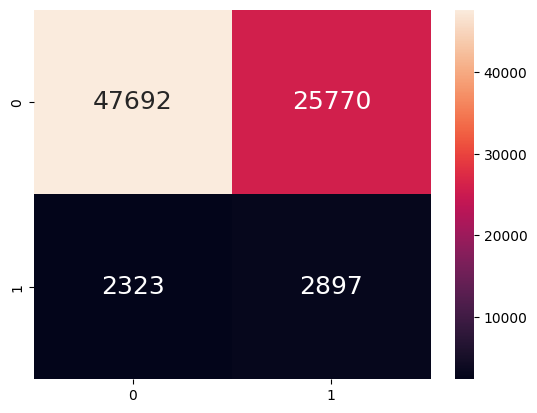

In [86]:
# assume grey and low risk is alive, high risk is failed
df2['Z_pred'] = df2['Z_pred'].apply(lambda x: 1 if x == 'High' else 0)

# Look at distribution
df2['Z_pred'].value_counts()

# Convert true y values to 0 and 1
true_y = df2["status_label"].map({"alive": 0, "failed": 1})
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

### Testset only

Z_pred
0    7588
1    4215
Name: count, dtype: int64

year status_label       ZX1       ZX2       ZX3        ZX4       ZX5  \
10362  2015        alive  0.304846  0.264173  0.079361   1.228579  1.231695   
64208  2006       failed  0.678140 -2.484637 -0.395457   1.029008  0.187886   
25229  2009        alive  0.184705 -2.409985 -0.057392  14.612968  0.335799   
11258  2015        alive  0.012660  0.046027 -0.063681   1.006405  0.231438   
72692  2011        alive  0.346267  0.102495  0.117304   0.635650  1.148085   

              Z  Z_pred  
10362  2.966390       0  
64208 -3.164439       1  
25229  5.761854       0  
11258  0.704763       1  
72692  2.475591       0

Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.95      0.66      0.78     11020
           1       0.10      0.54      0.17       783

    accuracy                           0.65     11803
   macro avg       0.53      0.60      0.47     11803
weighted avg       0.90      0.65      0.74     11803



<Axes: >

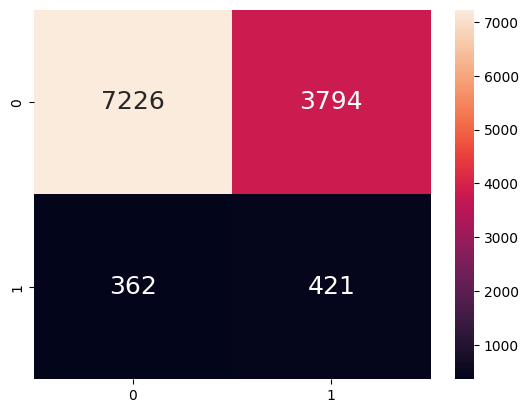

In [87]:
# Use the same indexes as in test set and apply to this new modified dataset
df2_test = df2.loc[df_test.index]

# assume grey and low risk is alive, high risk is failed
df2_test['Z_pred'].value_counts()

# Convert true y values to 0 and 1
true_y = df2_test["status_label"].map({"alive": 0, "failed": 1})

df2_test.head()
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2_test['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2_test['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

## Assume 'Grey' Zone is Failed

In [88]:
df2 = pd.read_csv("american_bankruptcy.csv")
df2['ZX1'] = (df2["X1"] - df2["X14"]) / df2["X10"] # (Current Assets - Current Liabilities) / Total Assets
df2['ZX2'] = df2['X15']/df2['X10'] # Retained Earnings / Total Assets
df2['ZX3'] = df2["X12"]/df2['X10'] # EBIT / Total Assets
df2['ZX4'] = df2['X8']/df2['X17'] # Market Captitalization / Total Liabilities
df2['ZX5'] = df2['X9']/df2['X10'] # Sales / Total Assets

df2["Z"] = 1.2*df2["ZX1"] + 1.4*df2["ZX2"] + 3.3*df2["ZX3"] + 0.6*df2["ZX4"] + 1*df2["ZX5"]


# Define conditions
conditions = [
    df2["Z"] < 1.8,  # High risk
    df2["Z"] > 3.0   # Low risk
]

# Define corresponding labels
labels = ['High', 'Low']

# Create the column using np.select, with default as 'Grey'
df2["Z_pred"] = np.select(conditions, labels, default='Grey')

# Remove unnecessary columns 
df2 = df2[["year","status_label","ZX1","ZX2","ZX3","ZX4","ZX5","Z","Z_pred"]]
df2.head()
df2["Z_pred"].value_counts()

year status_label       ZX1       ZX2       ZX3       ZX4       ZX5  \
0  1999        alive  0.468896  0.271291  0.095355  0.928438  1.382369   
1  2000        alive  0.513588  0.290751  0.065241  1.042794  1.245637   
2  2001        alive  0.402974  0.196569  0.006633  0.911564  0.899355   
3  2002        alive  0.280849  0.180749  0.005204  0.365979  0.883074   
4  2003        alive  0.424286  0.185938  0.029341  0.757853  0.919167   

          Z Z_pred  
0  3.196587    Low  
1  3.109968    Low  
2  2.226949   Grey  
3  1.709901   High  
4  2.240159   Grey

Z_pred
Low     36479
High    28667
Grey    13536
Name: count, dtype: int64

### Whole dataset

Z_pred
1    42203
0    36479
Name: count, dtype: int64

Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.96      0.48      0.64     73462
           1       0.09      0.72      0.16      5220

    accuracy                           0.49     78682
   macro avg       0.52      0.60      0.40     78682
weighted avg       0.90      0.49      0.61     78682



<Axes: >

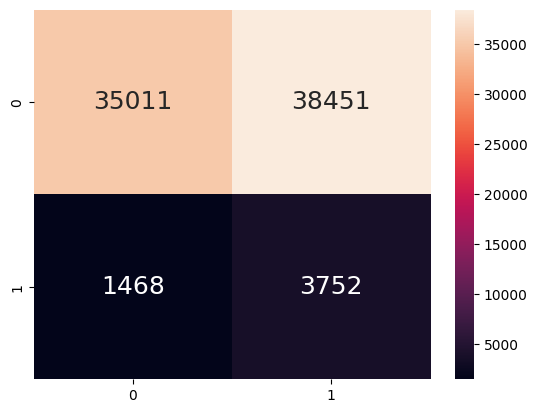

In [89]:
# assume grey and low risk is alive, high risk is failed
df2['Z_pred'] = df2['Z_pred'].apply(lambda x: 0 if x == 'Low' else 1)

# See class distribution
df2['Z_pred'].value_counts()

# Convert true y values to 0 and 1
true_y = df2["status_label"].map({"alive": 0, "failed": 1})
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

### Testset only

Z_pred
1    6264
0    5539
Name: count, dtype: int64

year status_label       ZX1       ZX2       ZX3        ZX4       ZX5  \
10362  2015        alive  0.304846  0.264173  0.079361   1.228579  1.231695   
64208  2006       failed  0.678140 -2.484637 -0.395457   1.029008  0.187886   
25229  2009        alive  0.184705 -2.409985 -0.057392  14.612968  0.335799   
11258  2015        alive  0.012660  0.046027 -0.063681   1.006405  0.231438   
72692  2011        alive  0.346267  0.102495  0.117304   0.635650  1.148085   

              Z  Z_pred  
10362  2.966390       1  
64208 -3.164439       1  
25229  5.761854       0  
11258  0.704763       1  
72692  2.475591       1

Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.96      0.48      0.64     11020
           1       0.09      0.71      0.16       783

    accuracy                           0.50     11803
   macro avg       0.52      0.59      0.40     11803
weighted avg       0.90      0.50      0.61     11803



<Axes: >

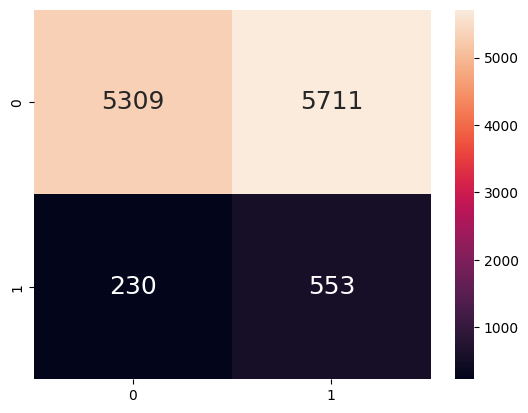

In [90]:
# Use the same indexes as in test set and apply to this new modified dataset
df2_test = df2.loc[df_test.index]

# assume grey and low risk is alive, high risk is failed
df2_test['Z_pred'].value_counts()

# Convert true y values to 0 and 1
true_y = df2_test["status_label"].map({"alive": 0, "failed": 1})

df2_test.head()
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2_test['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2_test['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

# Combine Random Forest with Neural Network (both trained with SMOTE)

In [107]:
# Load the exported random forest model
rf4 = joblib.load('rf4.pkl')

# Load exported neural network for consistency
smote_nn1 = load_model('smote_nn1.keras')

# Custom wrapper to use the neural network with sklearn's VotingClassifier
class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.threshold = threshold

    def fit(self, X, y):
        return self  # No need to re-train the neural network

    def predict(self, X):
        X_nn = X.copy()
        X_nn[:] = X_nn[:].div(X_nn['X10'], axis=0)
        X_nn = X_nn.drop(columns=['X10'])
        return (self.model.predict(X_nn).flatten() >= self.threshold).astype(int)  # Ensure 1D

    def predict_proba(self, X):
        X_nn = X.copy()
        X_nn[:] = X_nn[:].div(X_nn['X10'], axis=0)
        X_nn = X_nn.drop(columns=['X10'])
        prob_1 = self.model.predict(X_nn).flatten()  # Make sure it's 1D
        prob_0 = 1 - prob_1  # Compute P(0)
        return np.vstack([prob_0, prob_1]).T  # Stack into (N, 2) shape

# Custom Random Forest Classifier with adjustable threshold
class RandomForestWithThreshold(BaseEstimator, ClassifierMixin):
    def __init__(self, rf_model, threshold=0.5):
        self.rf_model = rf_model  # The pre-trained random forest model
        self.threshold = threshold  # The custom threshold for classification

    def fit(self, X, y):
        self.rf_model.fit(X, y)
        return self

    def predict(self, X):
        probs = self.rf_model.predict_proba(X)[:, 1]
        return (probs >= self.threshold).astype(int).flatten()  # Ensure 1D

    def predict_proba(self, X):
        return np.asarray(self.rf_model.predict_proba(X))  # Ensure it's a NumPy array


# Create custom Neural Network and Random Forest models with custom thresholds
keras_classifier = KerasClassifier(smote_nn1, threshold=0.48695409297943115)
rf_with_threshold = RandomForestWithThreshold(rf4, threshold=0.28)

In [109]:
# reset df
df = pd.read_csv("american_bankruptcy.csv")
df = df.drop('X16', axis=1)

# Split into train and test
df_train, df_test = train_test_split(df, test_size=0.15, stratify=df['status_label'], random_state=99)

# Split into X and y
y_train = df_train["status_label"].map({"alive": 0, "failed": 1})
X_train = df_train.drop(columns = ["company_name", "status_label", "year"])

y_test = df_test["status_label"].map({"alive": 0, "failed": 1})
X_test = df_test.drop(columns = ["company_name", "status_label", "year"])

## Hard voting

In [111]:
# Create the Voting Classifier with the custom Random Forest model and Neural Network
voting_clf1 = VotingClassifier(estimators=[
    ('rf', rf_with_threshold),
    ('nn', keras_classifier)
], voting='hard') 

# Train the Voting Classifier (you can train it on the original training data)
voting_clf1.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestWithThreshold(rf_model=RandomForestClassifier(n_estimators=500,
                                                                                        oob_score=True,
                                                                                        random_state=99,
                                                                                        warm_start=True),
                                                        threshold=0.28)),
                             ('nn',
                              KerasClassifier(model=<Sequential name=sequential_23, built=True>,
                                              threshold=0.48695409297943115))])

369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report (Voting Classifier with custom RF and NN threshold):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     11020
           1       0.62      0.25      0.35       783

    accuracy                           0.94     11803
   macro avg       0.78      0.62      0.66     11803
weighted avg       0.93      0.94      0.93     11803

Harmonic mean of Recall and Accuracy:  0.3889584400908526


<Axes: >

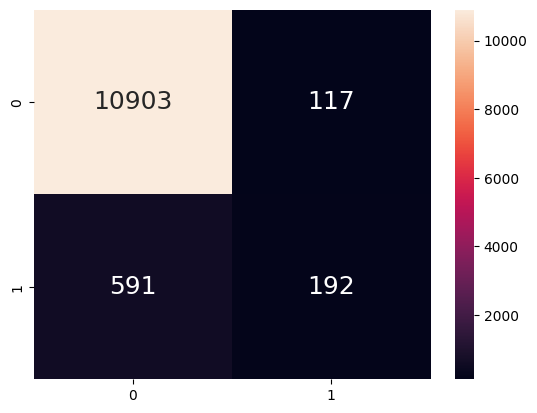

In [112]:
# Evaluate on the test set
y_pred = voting_clf1.predict(X_test)
print("Classification Report (Voting Classifier with custom RF and NN threshold):")
print(classification_report(y_test, y_pred))

# Compute precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculate harmonic mean of recall and accuracy
harmonic_mean = 2 * (recall * accuracy) / (recall + accuracy)

print("Harmonic mean of Recall and Accuracy: ", harmonic_mean)

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Soft voting

In [113]:
# Create the Voting Classifier with the custom Random Forest model and Neural Network
voting_clf2 = VotingClassifier(estimators=[
    ('rf', rf_with_threshold),
    ('nn', keras_classifier)
], voting='soft', weights = [0.65, 0.35])  # Use soft voting, higher weightage to random forest since it has better performance

# Train the Voting Classifier (you can train it on the original training data)
voting_clf2.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestWithThreshold(rf_model=RandomForestClassifier(n_estimators=500,
                                                                                        oob_score=True,
                                                                                        random_state=99,
                                                                                        warm_start=True),
                                                        threshold=0.28)),
                             ('nn',
                              KerasClassifier(model=<Sequential name=sequential_23, built=True>,
                                              threshold=0.48695409297943115))],
                 voting='soft', weights=[0.65, 0.35])

369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step    
Classification Report (Voting Classifier with custom RF and NN threshold):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11020
           1       0.85      0.12      0.21       783

    accuracy                           0.94     11803
   macro avg       0.90      0.56      0.59     11803
weighted avg       0.94      0.94      0.92     11803

Harmonic mean of Recall and Accuracy:  0.21090426428709372


<Axes: >

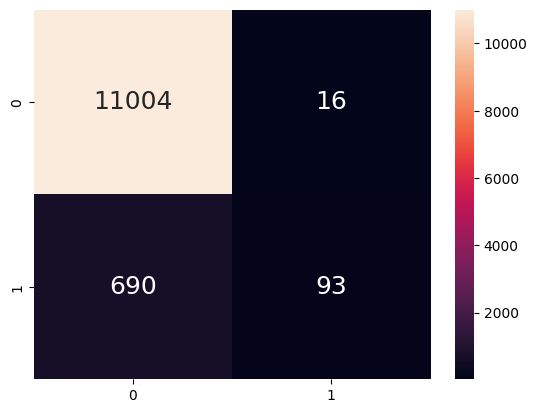

In [114]:
# Evaluate on the test set
y_pred = voting_clf2.predict(X_test)
print("Classification Report (Voting Classifier with custom RF and NN threshold):")
print(classification_report(y_test, y_pred))

# Compute precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculate harmonic mean of recall and accuracy
harmonic_mean = 2 * (recall * accuracy) / (recall + accuracy)

print("Harmonic mean of Recall and Accuracy: ", harmonic_mean)

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Changing Threshold

369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
Optimal Threshold: 0.23284920588731767
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     11020
           1       0.19      0.80      0.31       783

    accuracy                           0.77     11803
   macro avg       0.59      0.78      0.58     11803
weighted avg       0.93      0.77      0.82     11803



<Axes: >

Harmonic mean of Recall and Accuracy:  0.781024781769286
Precision: 0.1932
Recall: 0.7969
False Positives (FP): 2606
False Negatives (FN): 159
True Positives (TP): 624
True Negatives (TN): 8414


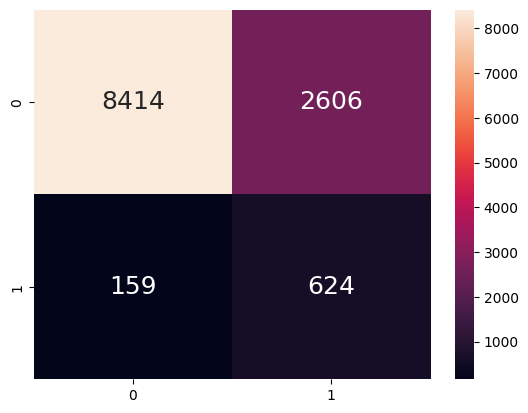

In [115]:
y_probs = voting_clf2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Choose the threshold that gives the best recall-precision tradeoff
best_threshold = thresholds[np.argmax(tpr - fpr)]

print(f"Optimal Threshold: {best_threshold}")
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

print(classification_report(y_test, y_pred_adjusted))

# Compute the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted),
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Compute precision and recall
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
accuracy = accuracy_score(y_test, y_pred_adjusted)

# Calculate harmonic mean of recall and accuracy
harmonic_mean = 2 * (recall * accuracy) / (recall + accuracy)

print("Harmonic mean of Recall and Accuracy: ", harmonic_mean)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)
tn, fp, fn, tp = cm.ravel()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")

In [121]:
# export model
joblib.dump(voting_clf2, 'voting_clf2.pkl')

['voting_clf2.pkl']